# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ —Ñ–∞–π–ª–æ–≤ –∏ –±–∏–±–ª–∏–æ—Ç–µ–∫

In [1]:
!pip install pmdarima
!pip install numpy==1.26.4
!pip install keras-tuner

from pmdarima import auto_arima
import warnings
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from io import BytesIO
from datetime import datetime
from bs4 import BeautifulSoup
import xml.etree.ElementTree as ET
from statsmodels.tsa.stattools import acf, pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout



warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# –ó–∞–≥—Ä—É–∑–∫–∞ —Ñ–∞–π–ª–∞ –¥–ª—è —Ç—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –º–æ–¥–µ–ª–∏
url_test = "https://github.com/samoletpanfilov/reinforcement_task/raw/refs/heads/master/data/test.xlsx"
response = requests.get(url_test)
df_test = pd.read_excel(BytesIO(response.content), engine='openpyxl')

# –ó–∞–≥—Ä—É–∑–∫–∞ –æ—Å–Ω–æ–≤–Ω–æ–≥–æ df
url1 = "https://github.com/samoletpanfilov/reinforcement_task/raw/refs/heads/master/data/train.xlsx"
response1 = requests.get(url1)
df1 = pd.read_excel(BytesIO(response1.content), engine='openpyxl')

# –ó–∞–≥—Ä—É–∑–∫–∞ —Ç—Ä–µ—Ç—å–µ–≥–æ —Ñ–∞–π–ª–∞
df2 = pd.read_excel('/content/–ú–∞–∫—Ä–æ–ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏_final.xlsx')
df2 = df2.fillna(method='ffill')

# –ê–Ω–∞–ª–∏–∑ –∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞

### –ø—Ä–æ—Å–º–æ—Ç—Ä —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏

In [3]:
print("–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –ø–µ—Ä–≤–æ–º DataFrame (train):")
df1.info()
print("_________________________________________________________")
df1.head()

–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –ø–µ—Ä–≤–æ–º DataFrame (train):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB
_________________________________________________________


dt  –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É
0 2015-01-05             32900
1 2015-01-12             32500
2 2015-01-19             32000
3 2015-01-26             30700
4 2015-02-02             30300

In [4]:
print("\n–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –≤—Ç–æ—Ä–æ–º DataFrame (–ú–∞–∫—Ä–æ–ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏):")
df2.info()
print("___________________________________________________________________________________________________")
df2.head()


–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –≤—Ç–æ—Ä–æ–º DataFrame (–ú–∞–∫—Ä–æ–ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2063 entries, 0 to 2062
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   dt                                                     2063 non-null   datetime64[ns]
 1   –ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏  2063 non-null   float64       
 2   –ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞                                        2063 non-null   float64       
 3   –ö—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞                                           2063 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 64.6 KB
___________________________________________________________________________________________________


dt  –ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏  \
0 2023-06-16                                         100.370000       
1 2023-06-15                                         100.741369       
2 2023-06-14                                         101.114112       
3 2023-06-13                                         101.488234       
4 2023-06-10                                         101.863741       

   –ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞  –ö—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞  
0              7.5       83.9611  
1              7.5       84.3249  
2              7.5       83.6405  
3              7.5       82.6417  
4              7.5       82.6417

In [5]:
# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –ø–æ –∫–æ–ª–æ–Ω–∫–µ 'dt'
df_ts = pd.merge(df1, df2,  on='dt', how='left')

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
print("\n–û–±—ä–µ–¥–∏–Ω–µ–Ω–Ω—ã–π DataFrame:")
df_ts.info()
print("________________________________________________________________________________________________________________________________________")
df_ts.head()

df_ts.to_excel('–û–±—ä–µ–¥–∏–Ω–µ–Ω–Ω—ã–π DataFrame.xlsx', index=False)


–û–±—ä–µ–¥–∏–Ω–µ–Ω–Ω—ã–π DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   dt                                                     400 non-null    datetime64[ns]
 1   –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É                                       400 non-null    int64         
 2   –ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏  286 non-null    float64       
 3   –ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞                                        286 non-null    float64       
 4   –ö—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞                                           286 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 15.8 KB
___________________________________________________________________

In [6]:

# import xml.etree.ElementTree as ET

# # –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏–∑ Excel
# file_path = '/content/–û–±—ä–µ–¥–∏–Ω–µ–Ω–Ω—ã–π DataFrame.xlsx'
# df_ts = pd.read_excel(file_path)

# # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ —Å –¥–∞—Ç–∞–º–∏
# df_ts['dt'] = pd.to_datetime(df_ts['dt'], format='%Y-%m-%d %H:%M:%S')

# # –î–∞–Ω–Ω—ã–µ –æ–± –∏–Ω–¥–µ–∫—Å–∞—Ö –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω (–ò–ü–¶) –ø–æ –º–µ—Å—è—Ü–∞–º
# ipc_data = {
#     "2015-01": 103.85, "2015-02": 102.22, "2015-03": 101.21, "2015-04": 100.46, "2015-05": 100.35,
#     "2015-06": 100.19, "2015-07": 100.80, "2015-08": 100.35, "2015-09": 100.57, "2015-10": 100.74,
#     "2015-11": 100.75, "2015-12": 100.77, "2016-01": 100.96, "2016-02": 100.63, "2016-03": 100.46,
#     "2016-04": 100.44, "2016-05": 100.41, "2016-06": 100.36, "2016-07": 100.54, "2016-08": 100.01,
#     "2016-09": 100.17, "2016-10": 100.43, "2016-11": 100.44, "2016-12": 100.40, "2017-01": 100.62,
#     "2017-02": 100.22, "2017-03": 100.13, "2017-04": 100.33, "2017-05": 100.37, "2017-06": 100.61,
#     "2017-07": 100.07, "2017-08": 99.46, "2017-09": 99.85, "2017-10": 100.20, "2017-11": 100.22,
#     "2017-12": 100.42, "2018-01": 100.31, "2018-02": 100.21, "2018-03": 100.29, "2018-04": 100.38,
#     "2018-05": 100.38, "2018-06": 100.49, "2018-07": 100.27, "2018-08": 100.01, "2018-09": 100.16,
#     "2018-10": 100.35, "2018-11": 100.50, "2018-12": 100.84, "2019-01": 101.01, "2019-02": 100.44,
#     "2019-03": 100.32, "2019-04": 100.29, "2019-05": 100.34, "2019-06": 100.04, "2019-07": 100.20,
#     "2019-08": 99.76, "2019-09": 99.84, "2019-10": 100.13, "2019-11": 100.28, "2019-12": 100.36,
#     "2020-01": 100.40, "2020-02": 100.33, "2020-03": 100.55, "2020-04": 100.83, "2020-05": 100.27,
#     "2020-06": 100.22, "2020-07": 100.35, "2020-08": 99.96, "2020-09": 99.93, "2020-10": 100.43,
#     "2020-11": 100.71, "2020-12": 100.83, "2021-01": 100.67, "2021-02": 100.78, "2021-03": 100.66,
#     "2021-04": 100.58, "2021-05": 100.74, "2021-06": 100.69, "2021-07": 100.31, "2021-08": 100.17,
#     "2021-09": 100.60, "2021-10": 101.11, "2021-11": 100.96, "2021-12": 100.82, "2022-01": 100.99,
#     "2022-02": 101.17, "2022-03": 107.61, "2022-04": 101.56, "2022-05": 100.12, "2022-06": 99.65,
#     "2022-07": 99.61, "2022-08": 99.48, "2022-09": 100.05, "2022-10": 100.18, "2022-11": 100.37,
#     "2022-12": 100.78, "2023-01": 100.84, "2023-02": 100.46, "2023-03": 100.37, "2023-04": 100.38,
#     "2023-05": 100.31, "2023-06": 100.37,
# }

# # –î–æ–±–∞–≤–ª—è–µ–º –∫–æ–ª–æ–Ω–∫—É –±–∞–∑–æ–≤–æ–≥–æ –ò–ü–¶
# df_ts["–ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏"] = None

# # –ó–∞–ø–æ–ª–Ω—è–µ–º –∫–æ–ª–æ–Ω–∫—É
# for i, row in df_ts.iterrows():
#     year_month = row['dt'].strftime("%Y-%m")
#     df_ts.at[i, "–ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏"] = ipc_data.get(year_month, 100)

# # –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∫—É—Ä—Å–∞ –¥–æ–ª–ª–∞—Ä–∞
# def get_usd_rate(date):
#     url = f'https://www.cbr.ru/scripts/XML_daily.asp?date_req={date.strftime("%d/%m/%Y")}'
#     response = requests.get(url)
#     if response.status_code == 200:
#         tree = ET.ElementTree(ET.fromstring(response.content))
#         for valute in tree.getroot().findall('Valute'):
#             if valute.find('CharCode').text == 'USD':
#                 return float(valute.find('Value').text.replace(',', '.'))
#     return None

# # –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∫–ª—é—á–µ–≤–æ–π —Å—Ç–∞–≤–∫–∏
# def get_key_rate(date):
#     url = 'https://www.cbr.ru/eng/hd_base/KeyRate/?UniDbQuery.Posted=True&UniDbQuery.From=05.01.2015&UniDbQuery.To=21.03.2025'
#     response = requests.get(url)
#     if response.status_code == 200:
#         soup = BeautifulSoup(response.content, 'html.parser')
#         table = soup.find('table', {'class': 'data'})
#         if table:
#             for row in table.find_all('tr')[1:]:
#                 cols = row.find_all('td')
#                 if len(cols) >= 2:
#                     rate_date = datetime.strptime(cols[0].text.strip(), '%d.%m.%Y')
#                     if rate_date <= date:
#                         return float(cols[1].text.replace(',', '.'))
#     return None

# # –ó–∞–ø–æ–ª–Ω—è–µ–º –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ
# for index, row in df_ts.iterrows():
#     if pd.isna(row['–ö—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞']):
#         df_ts.at[index, '–ö—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞'] = get_usd_rate(row['dt'])
#     if pd.isna(row['–ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞']):
#         df_ts.at[index, '–ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞'] = get_key_rate(row['dt'])

# # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ñ–∞–π–ª–∞
# df_ts.to_excel('/content/df_ts.xlsx', index=False)

In [7]:
df_ts = pd.read_excel('/content/df_ts.xlsx')
df_ts = df_ts.sort_values(by='dt', ascending=True)

In [8]:
print("\n–û–±—ä–µ–¥–∏–Ω–µ–Ω–Ω—ã–π DataFrame:")
df_ts.info()
print("________________________________________________________________________________________________________________________________________")
df_ts.head()



–û–±—ä–µ–¥–∏–Ω–µ–Ω–Ω—ã–π DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   dt                                                     400 non-null    datetime64[ns]
 1   –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É                                       400 non-null    int64         
 2   –ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏  400 non-null    float64       
 3   –ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞                                        400 non-null    float64       
 4   –ö—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞                                           400 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 15.8 KB
___________________________________________________________________

dt  –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É  \
0 2015-01-05             32900   
1 2015-01-12             32500   
2 2015-01-19             32000   
3 2015-01-26             30700   
4 2015-02-02             30300   

   –ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏  –ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞  \
0                                             103.85                 17.0   
1                                             103.85                 17.0   
2                                             103.85                 17.0   
3                                             103.85                 17.0   
4                                             102.22                 15.0   

   –ö—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞  
0       56.2376  
1       56.2376  
2       65.1738  
3       63.3930  
4       68.9291

In [9]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ NaN
df_ts['dt'].isna().sum()

0

In [10]:
df_ts.describe()

dt  –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É  \
count                  400        400.000000   
mean   2018-11-01 12:00:00      39229.475000   
min    2015-01-05 00:00:00      21000.000000   
25%    2016-12-03 06:00:00      31075.000000   
50%    2018-11-01 12:00:00      35450.000000   
75%    2020-09-29 18:00:00      42000.000000   
max    2022-08-29 00:00:00      79000.000000   
std                    NaN      13407.979668   

       –ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏  –ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞  \
count                                         400.000000           400.000000   
mean                                          100.534600             8.612500   
min                                            99.460000             4.250000   
25%                                           100.210000             6.750000   
50%                                           100.380000             7.750000   
75%                                           100.670000            10.500000   
max                                           107.610000            20.000000   
std                                             0.888096             3.100524   

       –ö—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞  
count    400.000000  
mean      66.149080  
min       49.790100  
25%       60.803825  
50%       65.094250  
75%       72.734725  
max      116.751700  
std        7.878073

In [11]:
df_ts.shape

(400, 5)

### –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è

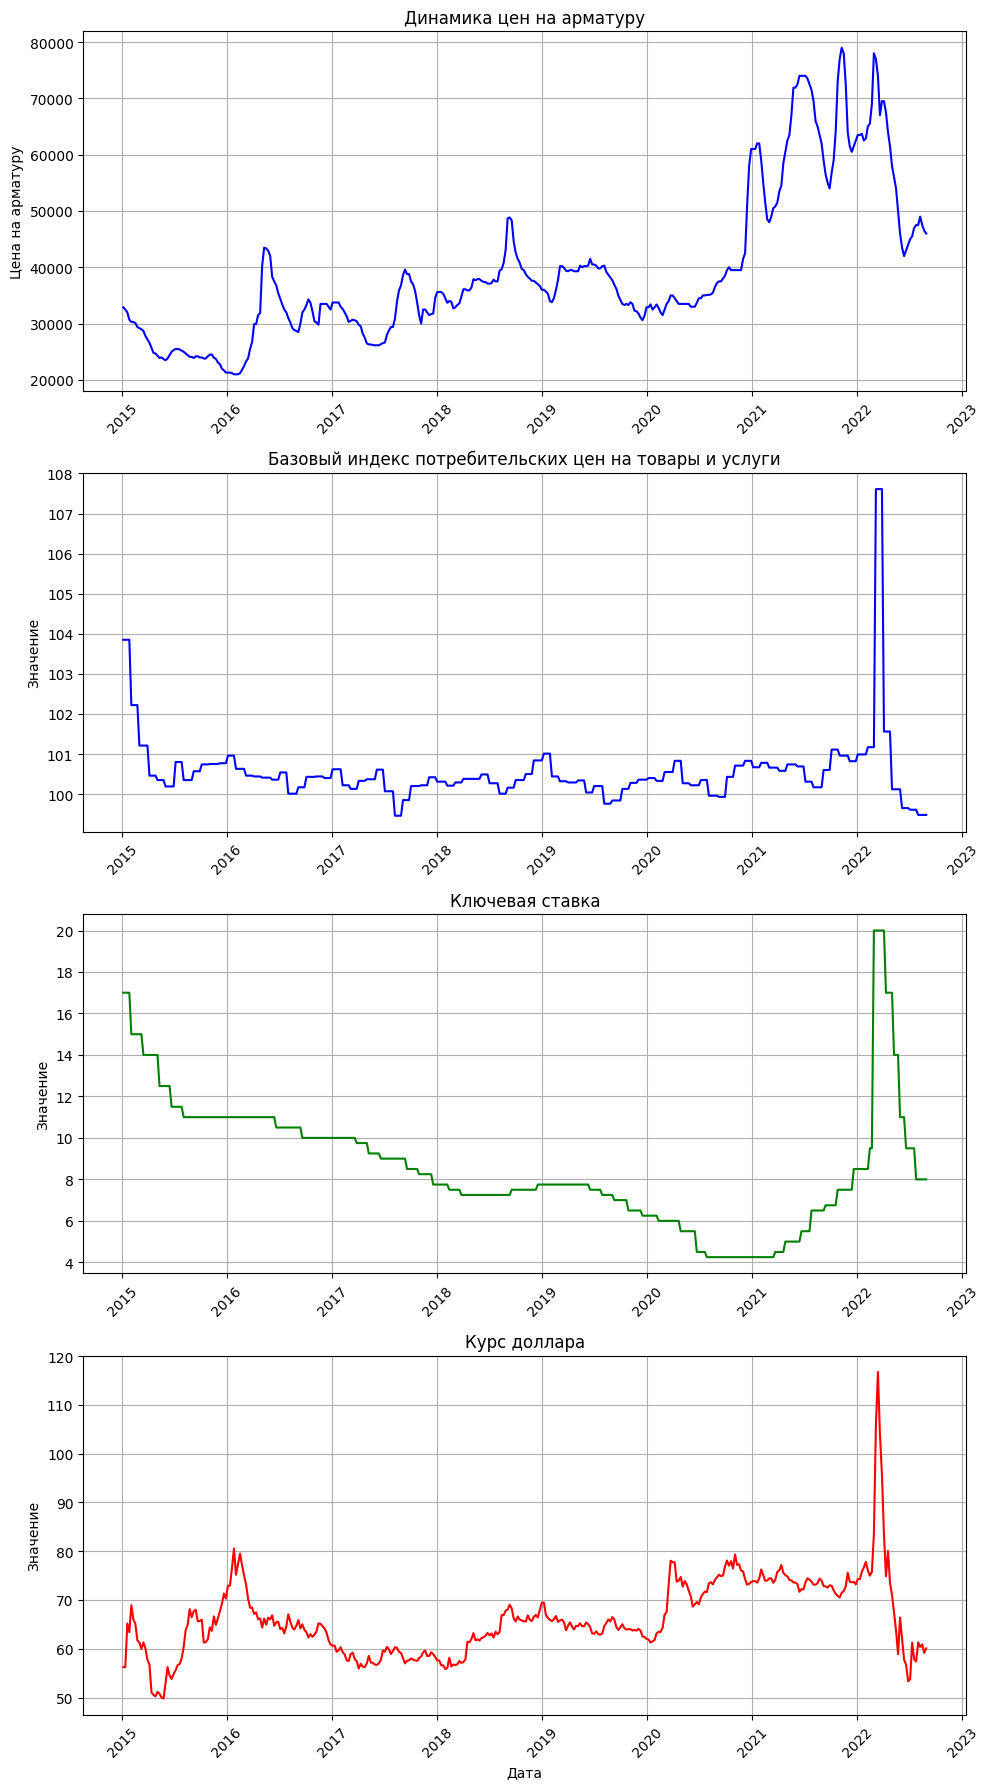

In [12]:
# –°–æ–∑–¥–∞–µ–º —Ñ–∏–≥—É—Ä—É –∏ –æ—Å–∏ (3 –≥—Ä–∞—Ñ–∏–∫–∞ –≤ –æ–¥–Ω–æ–º —Å—Ç–æ–ª–±—Ü–µ)
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 18))

# –ì—Ä–∞—Ñ–∏–∫ 1: –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É
axes[0].plot(df_ts['dt'], df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É"], marker='', linestyle='-', color='blue')
axes[0].set_title("–î–∏–Ω–∞–º–∏–∫–∞ —Ü–µ–Ω –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")
axes[0].set_ylabel("–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)

# –ì—Ä–∞—Ñ–∏–∫ 2: –ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω
axes[1].plot(df_ts['dt'], df_ts["–ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏"], marker='', linestyle='-', color='blue')
axes[1].set_title("–ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏")
axes[1].set_ylabel("–ó–Ω–∞—á–µ–Ω–∏–µ")
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)

# –ì—Ä–∞—Ñ–∏–∫ 3: –ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞
axes[2].plot(df_ts['dt'], df_ts["–ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞"], marker='', linestyle='-', color='green')
axes[2].set_title("–ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞")
axes[2].set_ylabel("–ó–Ω–∞—á–µ–Ω–∏–µ")
axes[2].grid(True)
axes[2].tick_params(axis='x', rotation=45)

# –ì—Ä–∞—Ñ–∏–∫ 4: –ö—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞
axes[3].plot(df_ts['dt'], df_ts["–ö—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞"], marker='', linestyle='-', color='red')
axes[3].set_title("–ö—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞")
axes[3].set_xlabel("–î–∞—Ç–∞")
axes[3].set_ylabel("–ó–Ω–∞—á–µ–Ω–∏–µ")
axes[3].grid(True)
axes[3].tick_params(axis='x', rotation=45)

# –£–ª—É—á—à–µ–Ω–∏–µ –∫–æ–º–ø–æ–Ω–æ–≤–∫–∏
plt.tight_layout()

# –ü–æ–∫–∞–∑ –≥—Ä–∞—Ñ–∏–∫–æ–≤
plt.show()

**–í–æ–ø—Ä–æ—Å—ã –∫ –≥—Ä–∞—Ñ–∏–∫—É:**

 1.–ï—Å—Ç—å –ª–∏ —Ç—Ä–µ–Ω–¥—ã?

 2.–ï—Å—Ç—å –ª–∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏?

 3.–ù–∞—Å–∫–æ–ª—å–∫–æ —Å–∏–ª—å–Ω—ã–π —à—É–º—ã?



In [13]:
# –ü–æ–ª—É—á–∏–ª '—Å—ã—Ä—ã–µ' –∑–Ω–∞—á–µ–Ω–∏—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π
acf(df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É"] ,nlags = 100, fft = False)

array([1.        , 0.99138242, 0.97367714, 0.95122039, 0.92740427,
       0.90357365, 0.88126621, 0.8606089 , 0.84235253, 0.82671727,
       0.81349611, 0.8020525 , 0.7925797 , 0.78508849, 0.78019657,
       0.77692922, 0.77376814, 0.76901294, 0.76227632, 0.75319077,
       0.74261145, 0.7309889 , 0.71862345, 0.7046383 , 0.68939965,
       0.67325908, 0.65612584, 0.63820561, 0.62109396, 0.60459259,
       0.58872289, 0.57435372, 0.56120831, 0.54900152, 0.5377084 ,
       0.5271632 , 0.51674918, 0.5068141 , 0.49691253, 0.48636205,
       0.47460061, 0.4600824 , 0.44257206, 0.42285538, 0.40223733,
       0.38033844, 0.35769402, 0.33517203, 0.31316745, 0.29306128,
       0.27522925, 0.2595102 , 0.24447201, 0.23086215, 0.21896621,
       0.20859445, 0.1993889 , 0.19088593, 0.18300826, 0.1757314 ,
       0.16880023, 0.16166525, 0.15350675, 0.14370082, 0.13267574,
       0.12198755, 0.11231837, 0.10288107, 0.0929827 , 0.08286002,
       0.07336018, 0.06476539, 0.05709237, 0.05068118, 0.04473

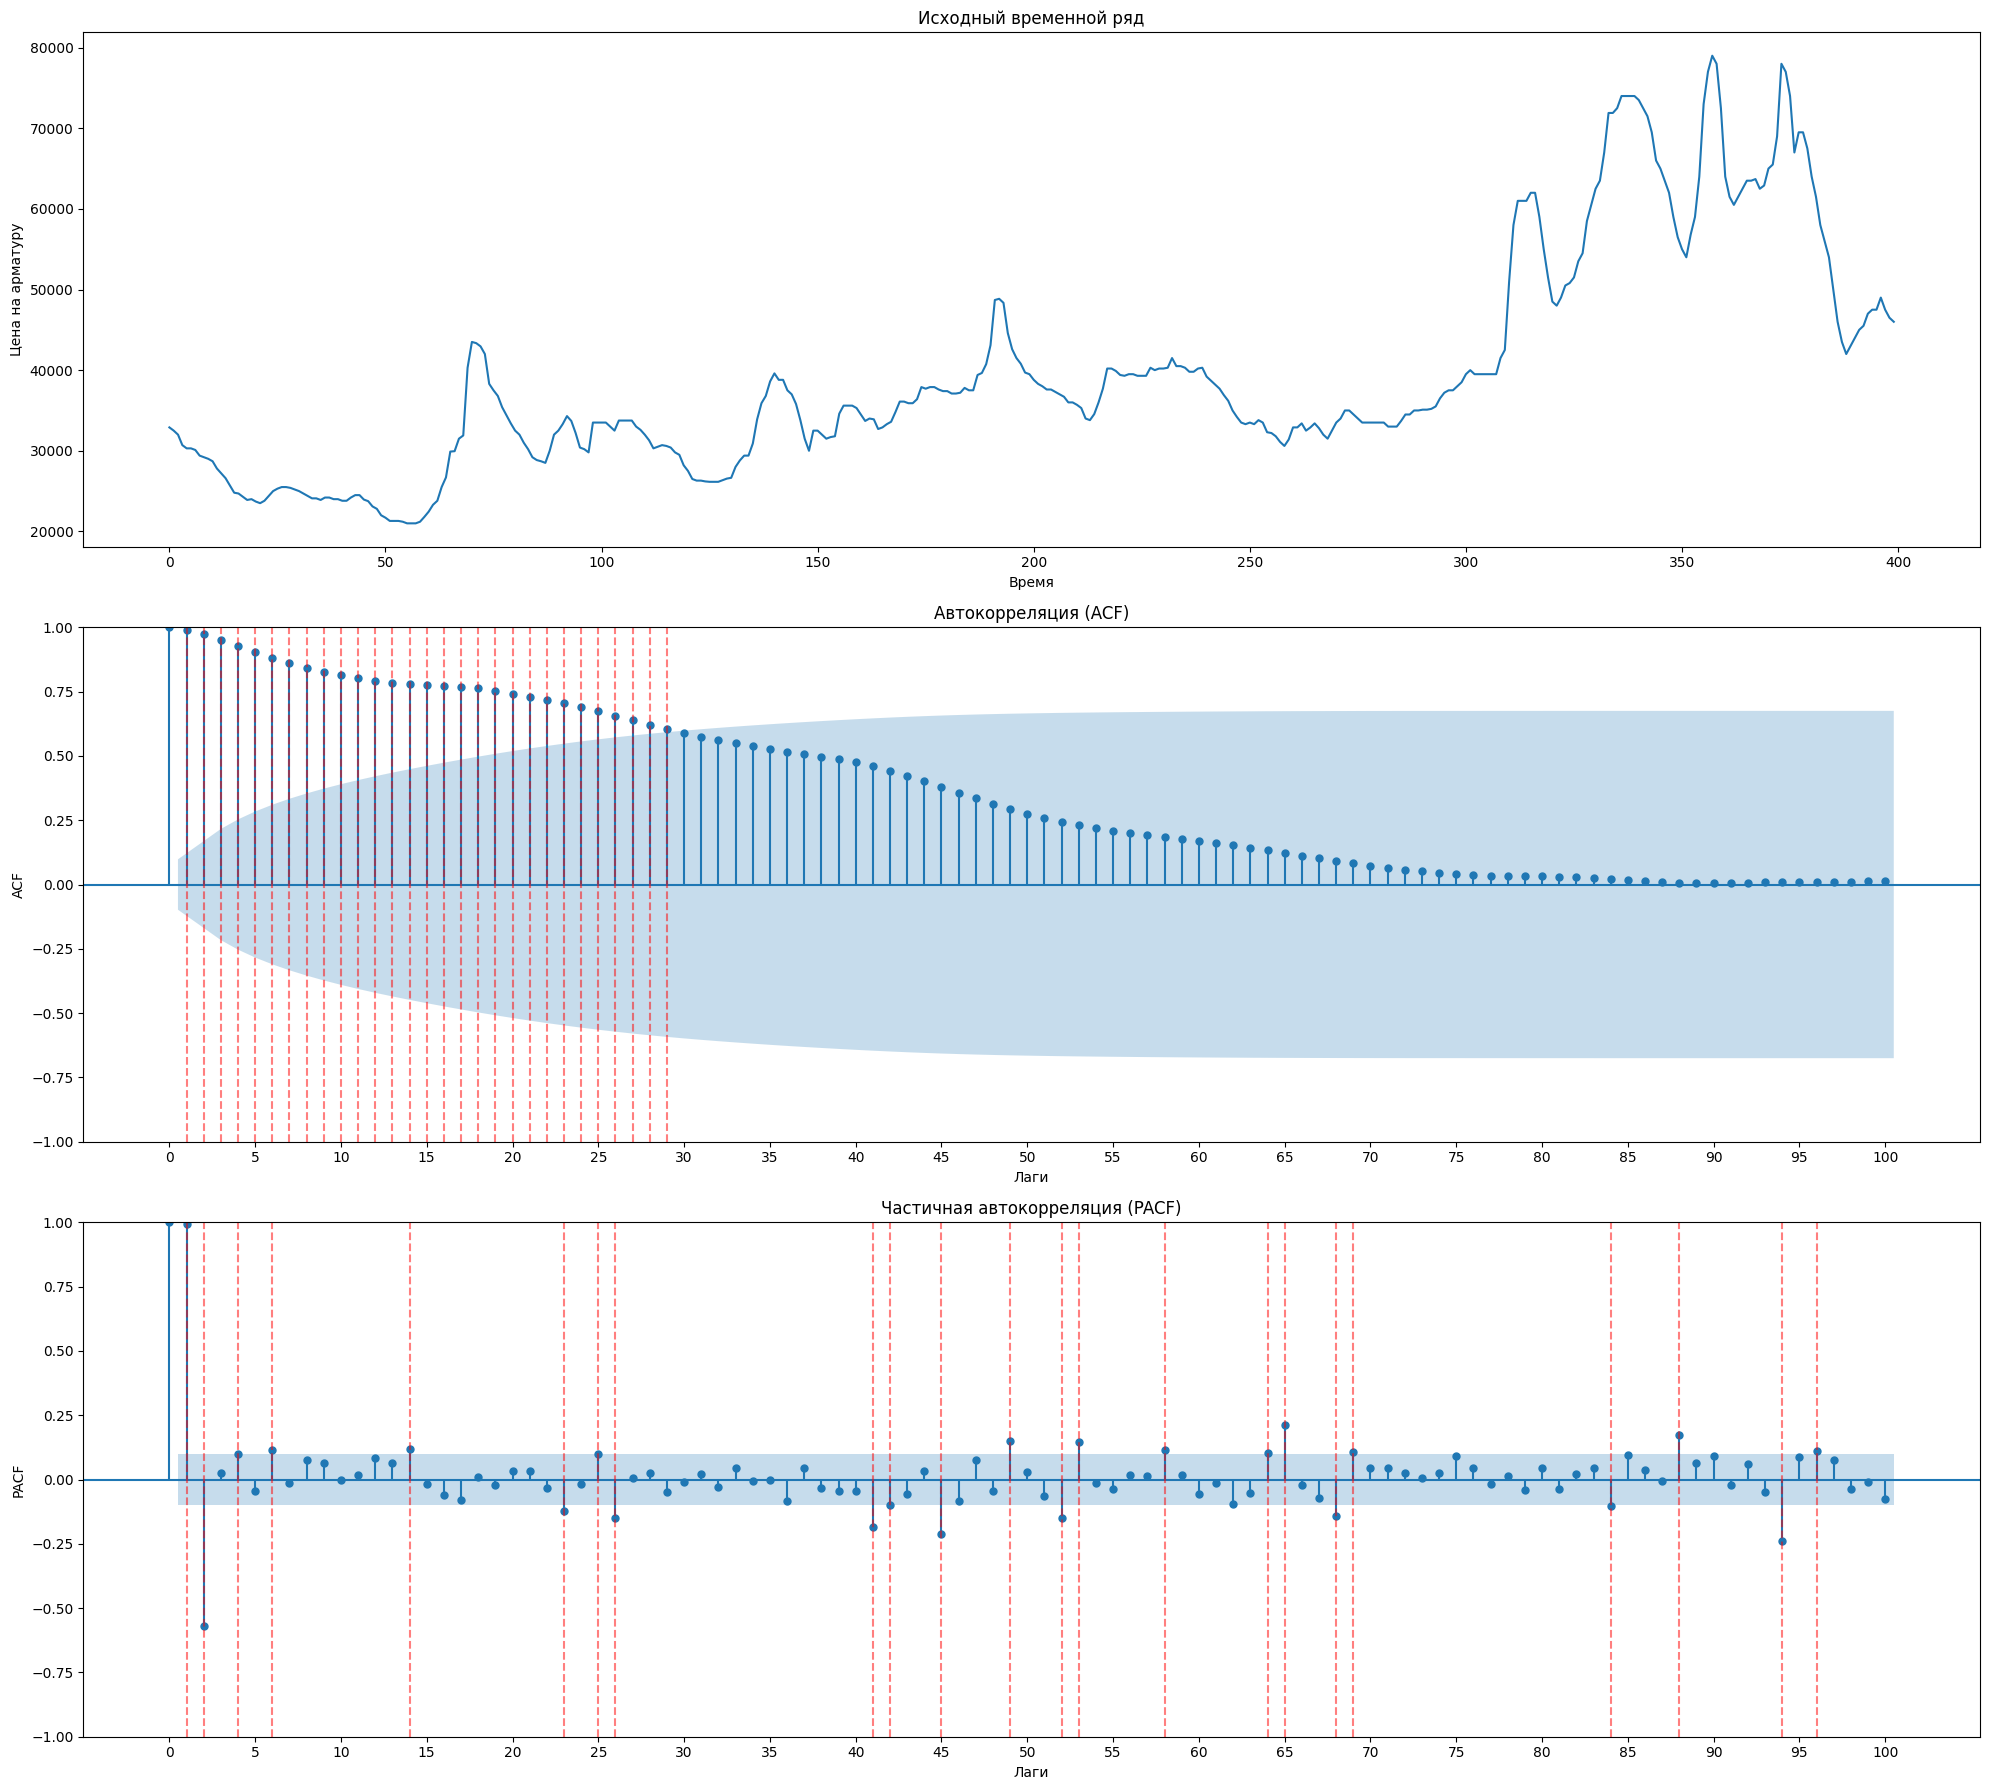

In [14]:
# –°–æ–∑–¥–∞–µ–º –≥—Ä–∞—Ñ–∏–∫ —Å —Ç—Ä–µ–º—è –ø–æ–¥–≥—Ä–∞—Ñ–∏–∫–∞–º–∏
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 18))

# –ü–µ—Ä–≤—ã–π –ø–æ–¥–≥—Ä–∞—Ñ–∏–∫: –∏—Å—Ö–æ–¥–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥
df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'].plot(ax=ax[0])
ax[0].set_title('–ò—Å—Ö–æ–¥–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥')
ax[0].set_xlabel('–í—Ä–µ–º—è')
ax[0].set_ylabel('–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É')

# –í—Ç–æ—Ä–æ–π –ø–æ–¥–≥—Ä–∞—Ñ–∏–∫: ACF (–∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è)
plot_acf(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'], lags=100, ax=ax[1], alpha=0.05)
ax[1].set_title('–ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (ACF)')
ax[1].set_xlabel('–õ–∞–≥–∏')
ax[1].set_ylabel('ACF')

# –ü–æ–ª—É—á–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è ACF –∏ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã
acf_values, confint = acf(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'], nlags=100, alpha=0.05)

# –î–æ–±–∞–≤–ª—è–µ–º –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω—ã–µ –ª–∏–Ω–∏–∏ –¥–ª—è –≤—ã–±—Ä–æ—Å–æ–≤
for lag in range(1, len(acf_values)):  # –ù–∞—á–∏–Ω–∞–µ–º —Å 1, —Ç–∞–∫ –∫–∞–∫ lag=0 –≤—Å–µ–≥–¥–∞ —Ä–∞–≤–µ–Ω 1
    if abs(acf_values[lag]) > confint[lag, 1] - acf_values[lag]:  # –ü—Ä–æ–≤–µ—Ä—è–µ–º, –≤—ã—Ö–æ–¥–∏—Ç –ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ –∑–∞ –ø—Ä–µ–¥–µ–ª—ã –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞
        ax[1].axvline(x=lag, color='red', linestyle='--', alpha=0.5)  # –î–æ–±–∞–≤–ª—è–µ–º –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω—É—é –ª–∏–Ω–∏—é

# –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –Ω–∞ –æ—Å–∏ X –æ—Ç–æ–±—Ä–∞–∂–∞—é—Ç—Å—è –≤—Å–µ –ª–∞–≥–∏
ax[1].set_xticks(np.arange(0, 101, 5))  # –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –∫–∞–∂–¥—ã–µ 5 –ª–∞–≥–æ–≤
ax[1].set_xticklabels(np.arange(0, 101, 5))  # –ü–æ–¥–ø–∏—Å—ã–≤–∞–µ–º –æ—Å–∏

# –¢—Ä–µ—Ç–∏–π –ø–æ–¥–≥—Ä–∞—Ñ–∏–∫: PACF (—á–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è)
plot_pacf(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'], lags=100, ax=ax[2], method='ols', alpha=0.05)
ax[2].set_title('–ß–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (PACF)')
ax[2].set_xlabel('–õ–∞–≥–∏')
ax[2].set_ylabel('PACF')

# –ü–æ–ª—É—á–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è PACF –∏ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã
pacf_values, confint = pacf(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'], nlags=100, method='ols', alpha=0.05)

# –î–æ–±–∞–≤–ª—è–µ–º –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω—ã–µ –ª–∏–Ω–∏–∏ –¥–ª—è –≤—ã–±—Ä–æ—Å–æ–≤
for lag in range(1, len(pacf_values)):  # –ù–∞—á–∏–Ω–∞–µ–º —Å 1, —Ç–∞–∫ –∫–∞–∫ lag=0 –≤—Å–µ–≥–¥–∞ —Ä–∞–≤–µ–Ω 1
    if abs(pacf_values[lag]) > confint[lag, 1] - pacf_values[lag]:  # –ü—Ä–æ–≤–µ—Ä—è–µ–º, –≤—ã—Ö–æ–¥–∏—Ç –ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ –∑–∞ –ø—Ä–µ–¥–µ–ª—ã –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞
        ax[2].axvline(x=lag, color='red', linestyle='--', alpha=0.5)  # –î–æ–±–∞–≤–ª—è–µ–º –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω—É—é –ª–∏–Ω–∏—é

# –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –Ω–∞ –æ—Å–∏ X –æ—Ç–æ–±—Ä–∞–∂–∞—é—Ç—Å—è –≤—Å–µ –ª–∞–≥–∏
ax[2].set_xticks(np.arange(0, 101, 5))  # –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –∫–∞–∂–¥—ã–µ 5 –ª–∞–≥–æ–≤
ax[2].set_xticklabels(np.arange(0, 101, 5))  # –ü–æ–¥–ø–∏—Å—ã–≤–∞–µ–º –æ—Å–∏

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –≥—Ä–∞—Ñ–∏–∫
plt.tight_layout()
plt.show()

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# –§—É–Ω–∫—Ü–∏—è –∞–Ω–∞–ª–∏–∑–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –∏ —Å–æ–∑–¥–∞–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
def analyze_and_create_features(df, columns, period=26, threshold_trend=0.05, threshold_seasonal=0.05):
    """
    –ê–Ω–∞–ª–∏–∑ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –∏ —Å–æ–∑–¥–∞–Ω–∏–µ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ç—Ä–µ–Ω–¥–∞, —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ –∏ –æ—Å—Ç–∞—Ç–∫–∞.
    """
    df = df.interpolate(method='linear')  # –õ–∏–Ω–µ–π–Ω–∞—è –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏—è
    df = df.fillna(method='ffill').fillna(method='bfill')  # –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –∫—Ä–∞–π–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π

    features = pd.DataFrame(index=df.index)

    for col in columns:
        print(f"\n–ê–Ω–∞–ª–∏–∑ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞: {col}")

        if df[col].isna().sum() > 0:
            print(f"‚ö† –í–Ω–∏–º–∞–Ω–∏–µ! –í –∫–æ–ª–æ–Ω–∫–µ {col} –æ—Å—Ç–∞–ª–∏—Å—å –ø—Ä–æ–ø—É—Å–∫–∏ –ø–æ—Å–ª–µ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏.")
            continue

        # –î–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è
        decomposition = seasonal_decompose(df[col], period=period, model='additive', extrapolate_trend=True)

        # –û—Ü–µ–Ω–∫–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ —Ç—Ä–µ–Ω–¥–∞ –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏
        trend_missing_ratio = decomposition.trend.isna().mean()
        observed_std = np.nanstd(decomposition.observed)
        trend_std = np.nanstd(decomposition.trend) / observed_std if observed_std != 0 else 0
        seasonal_strength = 1 - (np.nanvar(decomposition.resid) / np.nanvar(decomposition.observed) if np.nanvar(decomposition.observed) != 0 else 1)

        use_trend = trend_missing_ratio < threshold_trend and trend_std > 0.1
        use_seasonal = seasonal_strength > threshold_seasonal

        print(f"  ‚Üí –î–æ–ª—è NaN –≤ —Ç—Ä–µ–Ω–¥–µ: {trend_missing_ratio:.2f}")
        print(f"  ‚Üí –û—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ —Ç—Ä–µ–Ω–¥–∞: {trend_std:.2f}")
        print(f"  ‚Üí –°–∏–ª–∞ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏: {seasonal_strength:.2f}")

        if use_trend:
            features[f"{col}_trend"] = decomposition.trend
            print(f"  ‚úÖ –î–æ–±–∞–≤–ª–µ–Ω —Ç—Ä–µ–Ω–¥ {col}")

        if use_seasonal:
            features[f"{col}_seasonal"] = decomposition.seasonal
            print(f"  ‚úÖ –î–æ–±–∞–≤–ª–µ–Ω–∞ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å {col}")

        features[f"{col}_residual"] = decomposition.resid
        print(f"  ‚úÖ –î–æ–±–∞–≤–ª–µ–Ω –æ—Å—Ç–∞—Ç–æ–∫ (—à—É–º) {col}")

    return features

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
df_ts = pd.read_excel("df_ts.xlsx", parse_dates=["dt"])

# –£–ª—É—á—à–µ–Ω–Ω–æ–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤
df_ts = df_ts.interpolate(method='linear')
df_ts = df_ts.fillna(method='ffill').fillna(method='bfill')

columns_to_analyze = ["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É", "–ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏", "–ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞", "–ö—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞"]

# –°–æ–∑–¥–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
features = analyze_and_create_features(df_ts, columns_to_analyze, period=26)

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞–ª–∏—á–∏–µ —Å—Ç–æ–ª–±—Ü–æ–≤ –∏ –∑–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏
for col in columns_to_analyze:
    for suffix in ["trend", "seasonal", "residual"]:
        col_name = f"{col}_{suffix}"
        if col_name in df_ts.columns:
            # –ï—Å–ª–∏ –∫–æ–ª–æ–Ω–∫–∞ —É–∂–µ –µ—Å—Ç—å, –∑–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏
            df_ts[col_name].fillna(features[col_name], inplace=True)
            print(f"üîÑ –ó–∞–ø–æ–ª–Ω–µ–Ω—ã –ø—Ä–æ–ø—É—Å–∫–∏ –≤ {col_name}")
        else:
            # –ï—Å–ª–∏ –∫–æ–ª–æ–Ω–∫–∏ –Ω–µ—Ç, –¥–æ–±–∞–≤–ª—è–µ–º –µ–µ
            df_ts[col_name] = features[col_name]
            print(f"‚úÖ –î–æ–±–∞–≤–ª–µ–Ω–∞ –Ω–æ–≤–∞—è –∫–æ–ª–æ–Ω–∫–∞ {col_name}")

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
df_ts.to_excel("df_ts_ml.xlsx", index=True)

# –§—É–Ω–∫—Ü–∏—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏–∏ –¥–ª—è –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –∫–æ–ª–æ–Ω–æ–∫
def plot_multiple_decompositions(df, columns, period=26):
    """
    –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏–∏ –¥–ª—è –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤.

    :param df: DataFrame —Å –≤—Ä–µ–º–µ–Ω–Ω—ã–º–∏ —Ä—è–¥–∞–º–∏.
    :param columns: –°–ø–∏—Å–æ–∫ –∫–æ–ª–æ–Ω–æ–∫ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞.
    :param period: –ü–µ—Ä–∏–æ–¥ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏.
    """
    for column in columns:
        if column not in df.columns:
            print(f"‚ö† –ö–æ–ª–æ–Ω–∫–∞ {column} –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –≤ –¥–∞–Ω–Ω—ã—Ö, –ø—Ä–æ–ø—É—Å–∫–∞–µ–º.")
            continue

        if df[column].isna().sum() > 0:
            print(f"‚ö† –ü—Ä–æ–ø—É—Å–∫–∏ –≤ {column}, –ø—Ä–æ–ø—É—Å–∫–∞–µ–º –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—é.")
            continue

        decompose = seasonal_decompose(df[column], period=period, model='additive', extrapolate_trend=True)

        fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 20))

        ax[0].plot(decompose.observed, color='blue')
        ax[0].set_title(f'–û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π —Ä—è–¥: {column}')
        ax[0].grid(True)

        ax[1].plot(decompose.trend, color='green')
        ax[1].set_title('–¢—Ä–µ–Ω–¥')
        ax[1].grid(True)

        ax[2].plot(decompose.seasonal, color='orange')
        ax[2].set_title('–°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å')
        ax[2].grid(True)

        ax[3].plot(decompose.resid, color='red')
        ax[3].set_title('–®—É–º (–æ—Å—Ç–∞—Ç–∫–∏)')
        ax[3].set_xlabel("–î–∞—Ç–∞")
        ax[3].grid(True)

        plt.tight_layout()
        plt.show()



# –°–æ–∑–¥–∞–Ω–∏–µ DataFrame —Å –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞–º–∏ (–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–æ)
df_components = pd.DataFrame(index=df_ts.index)

for col in columns_to_analyze:
    if df_ts[col].isna().sum() > 0:
        print(f"‚ö† –ü—Ä–æ–ø—É—Å–∫–∞–µ–º {col}, —Ç–∞–∫ –∫–∞–∫ –µ—Å—Ç—å NaN.")
        continue

    decomposition = seasonal_decompose(df_ts[col], period=26, model='additive', extrapolate_trend=True)
    df_components[f"{col}_trend"] = decomposition.trend
    df_components[f"{col}_seasonal"] = decomposition.seasonal
    df_components[f"{col}_residual"] = decomposition.resid

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–æ–≤
df_components.to_csv("decomposed_components.csv")


–ê–Ω–∞–ª–∏–∑ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞: –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É
  ‚Üí –î–æ–ª—è NaN –≤ —Ç—Ä–µ–Ω–¥–µ: 0.00
  ‚Üí –û—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ —Ç—Ä–µ–Ω–¥–∞: 0.93
  ‚Üí –°–∏–ª–∞ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏: 0.90
  ‚úÖ –î–æ–±–∞–≤–ª–µ–Ω —Ç—Ä–µ–Ω–¥ –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É
  ‚úÖ –î–æ–±–∞–≤–ª–µ–Ω–∞ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É
  ‚úÖ –î–æ–±–∞–≤–ª–µ–Ω –æ—Å—Ç–∞—Ç–æ–∫ (—à—É–º) –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É

–ê–Ω–∞–ª–∏–∑ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞: –ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏
  ‚Üí –î–æ–ª—è NaN –≤ —Ç—Ä–µ–Ω–¥–µ: 0.00
  ‚Üí –û—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ —Ç—Ä–µ–Ω–¥–∞: 0.55
  ‚Üí –°–∏–ª–∞ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏: 0.42
  ‚úÖ –î–æ–±–∞–≤–ª–µ–Ω —Ç—Ä–µ–Ω–¥ –ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏
  ‚úÖ –î–æ–±–∞–≤–ª–µ–Ω–∞ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏
  ‚úÖ –î–æ–±–∞–≤–ª–µ–

In [16]:
df_components.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É_trend                                          400 non-null    float64
 1   –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É_seasonal                                       400 non-null    float64
 2   –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É_residual                                       400 non-null    float64
 3   –ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏_trend     400 non-null    float64
 4   –ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏_seasonal  400 non-null    float64
 5   –ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏_resid

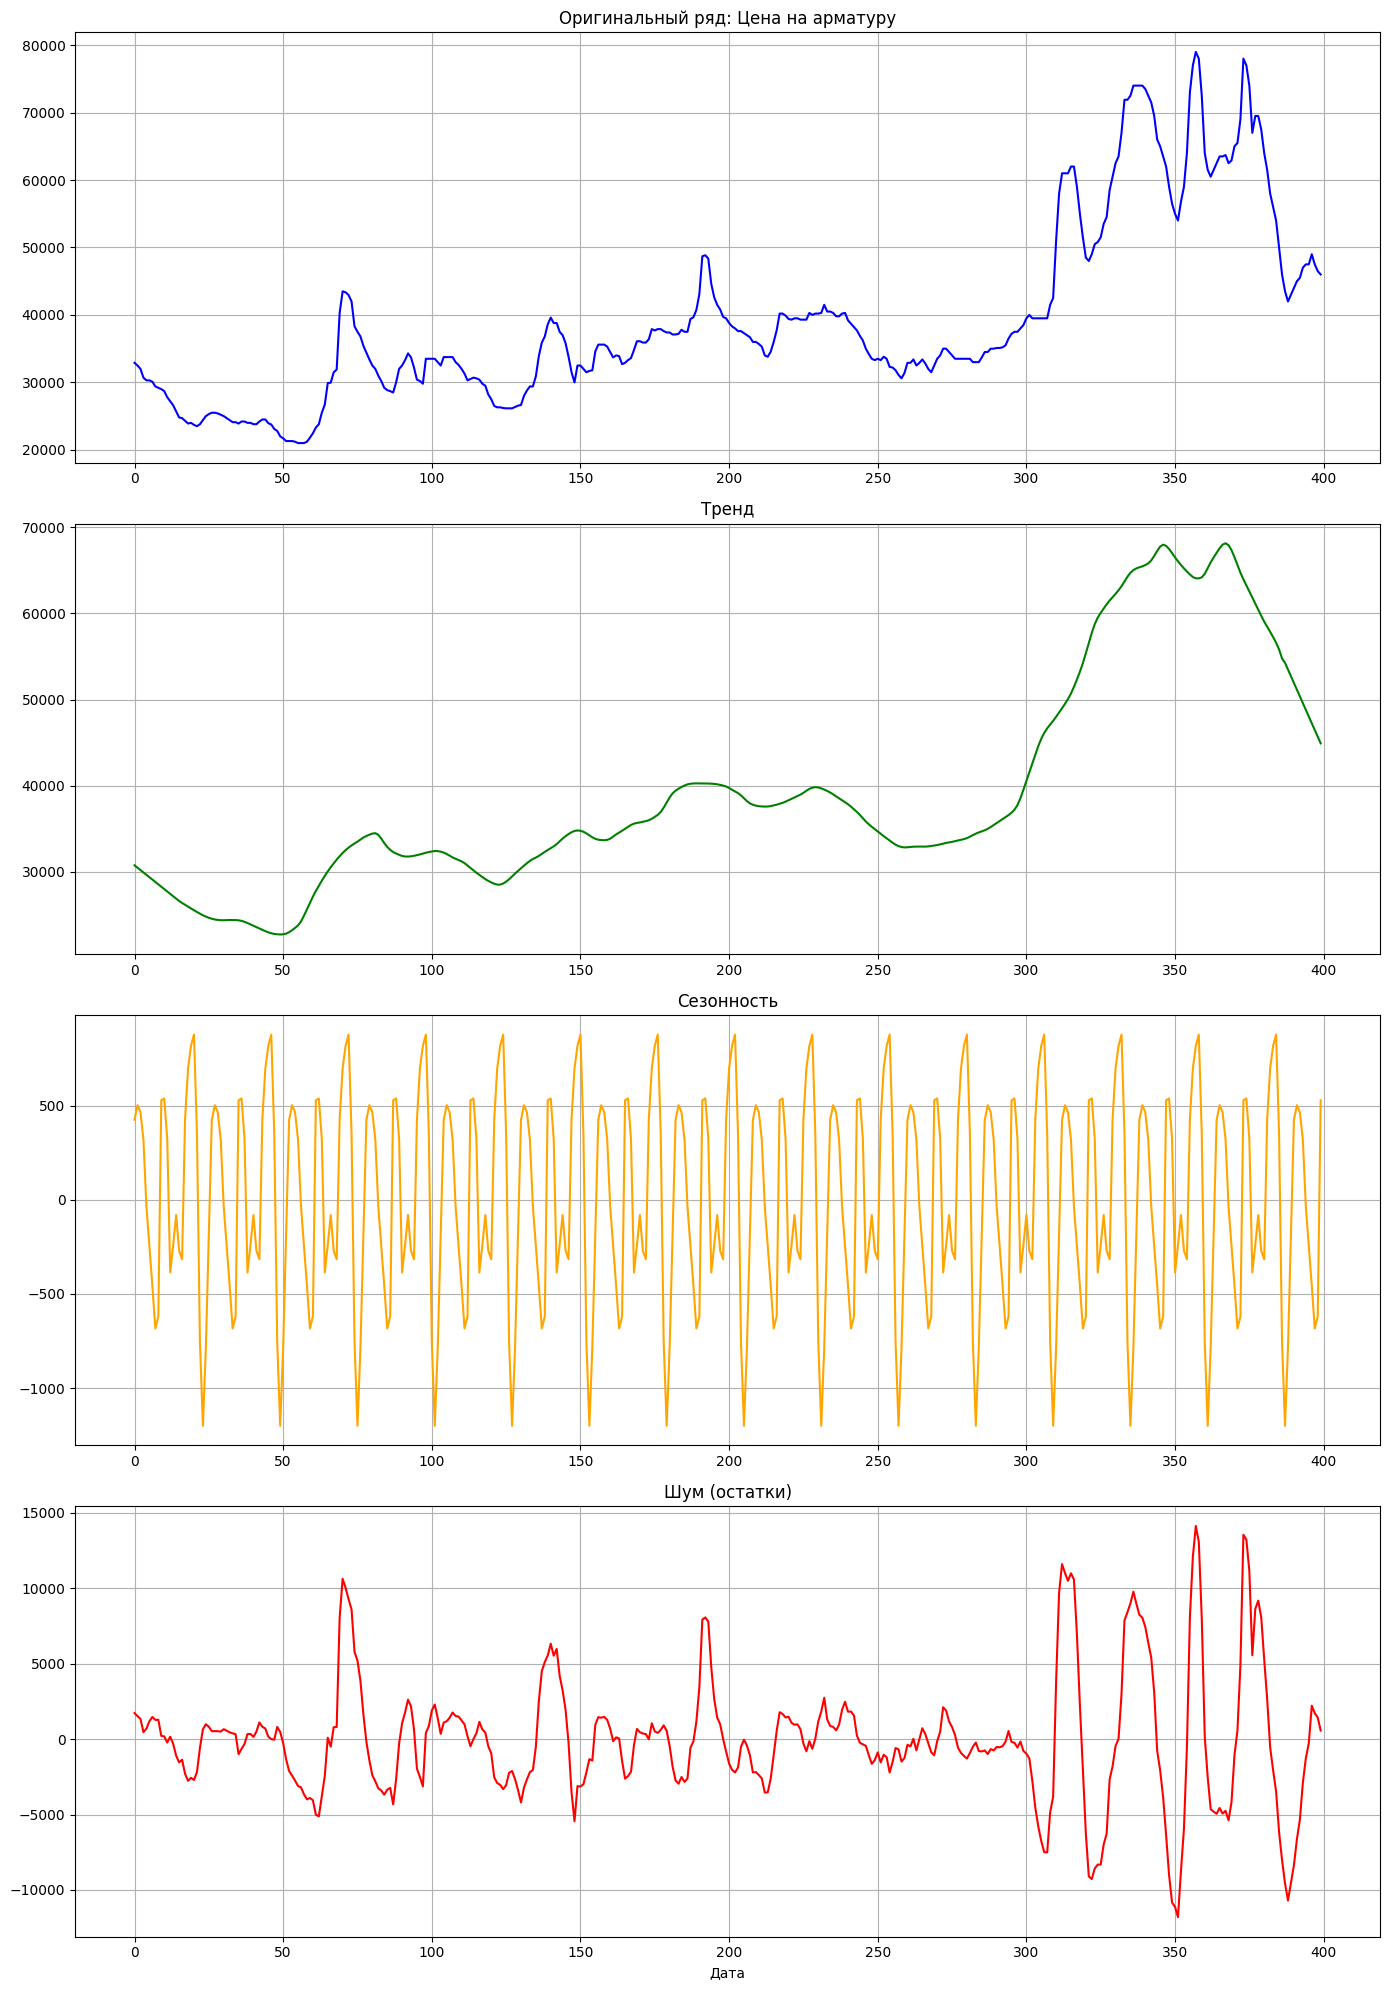

In [17]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏–∏ –¥–ª—è –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
selected_columns = ["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É"]  # –ú–æ–∂–Ω–æ –º–µ–Ω—è—Ç—å —Å–ø–∏—Å–æ–∫
plot_multiple_decompositions(df_ts, selected_columns, period=26)

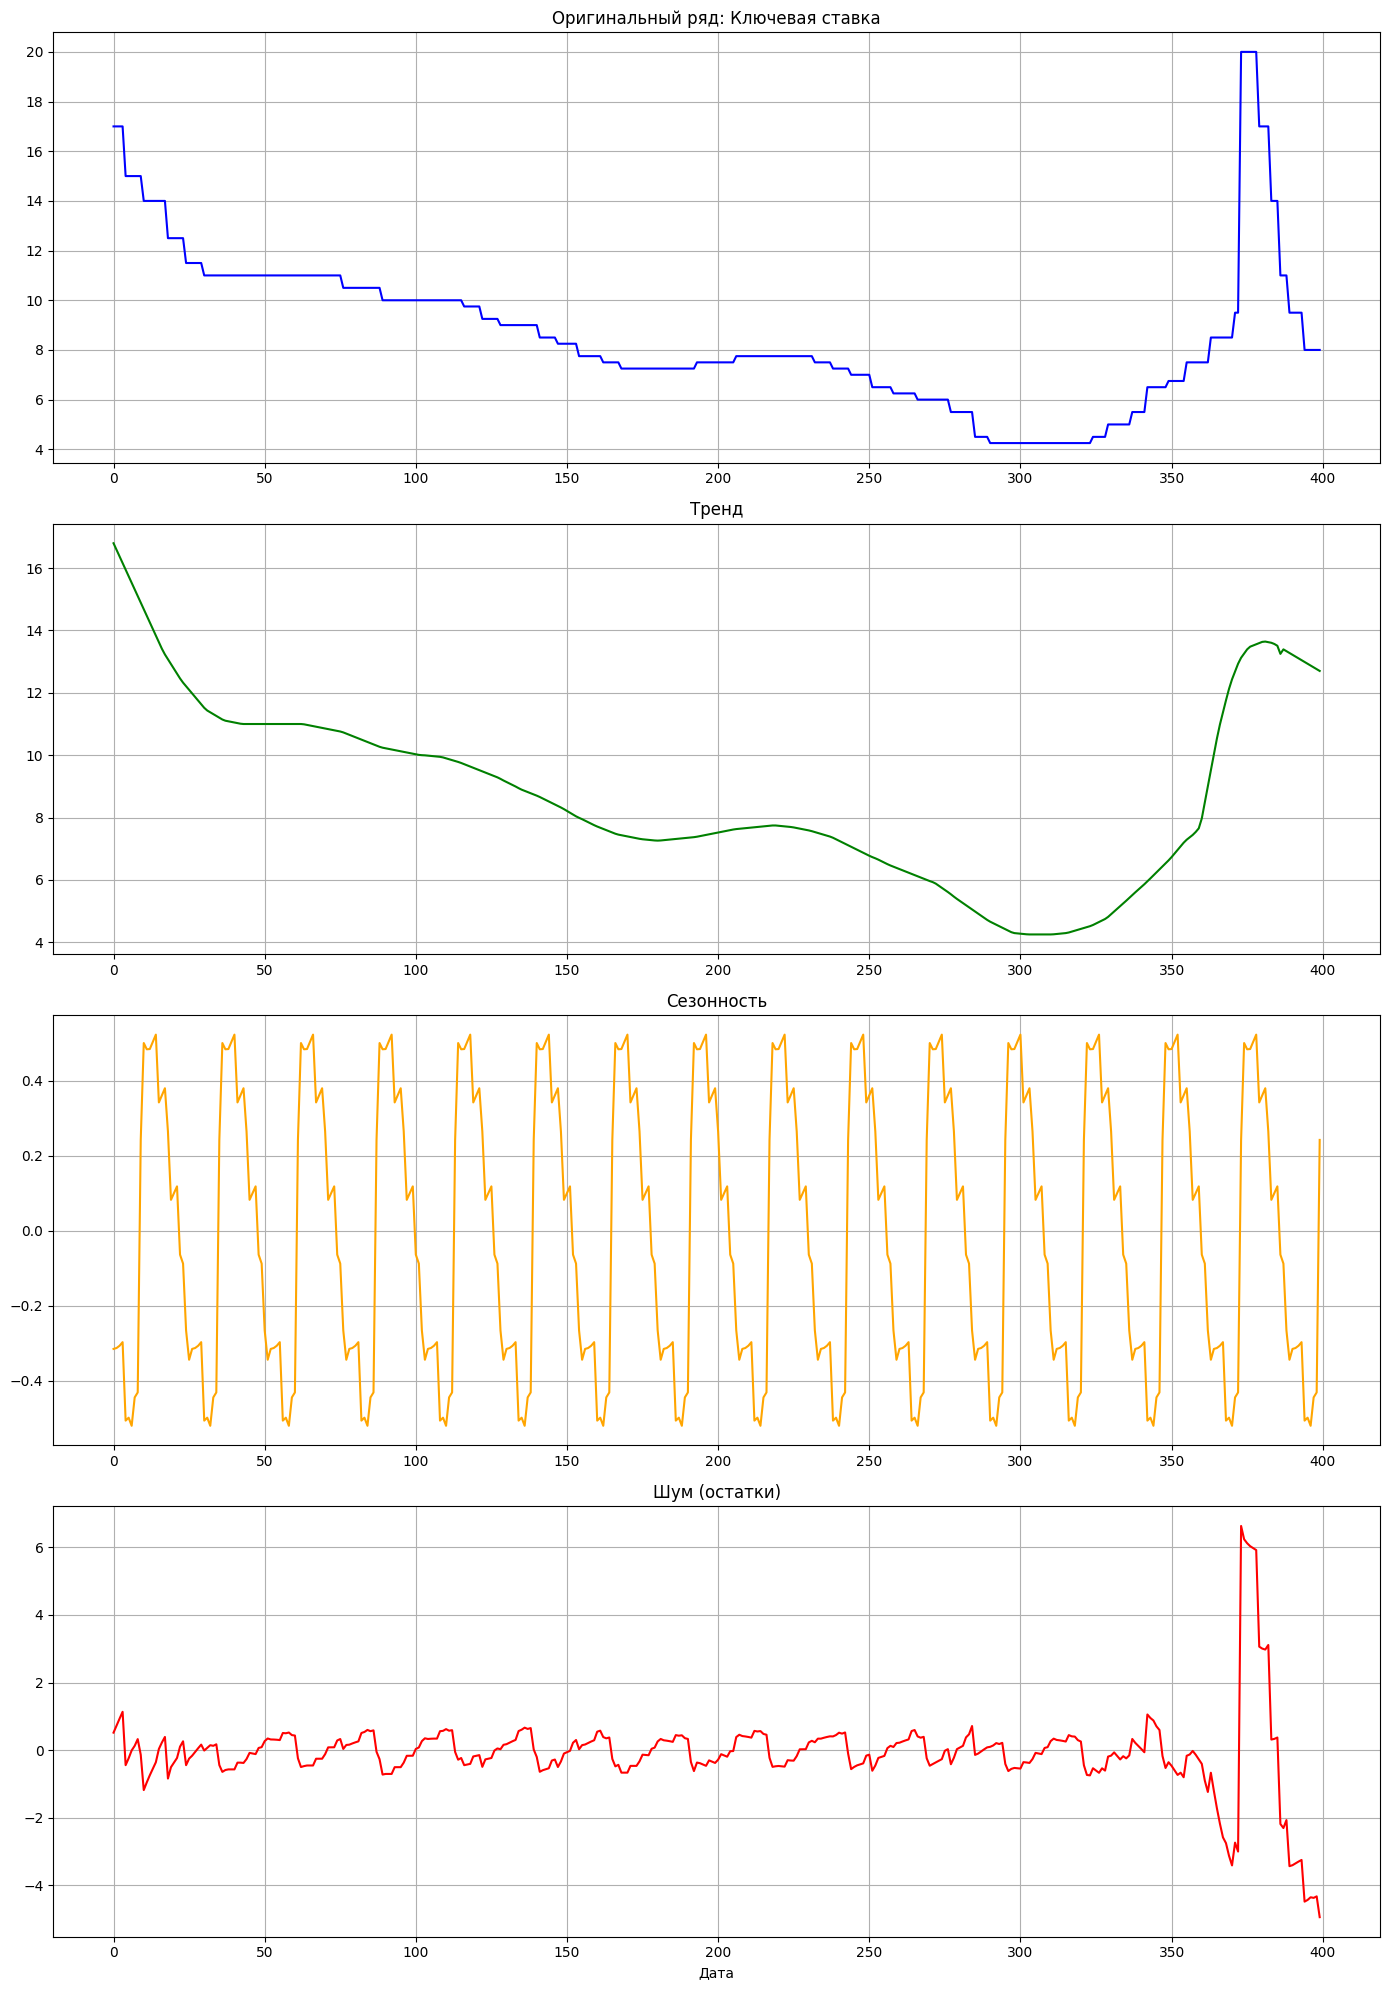

In [18]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏–∏ –¥–ª—è –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
selected_columns = ["–ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞"]  # –ú–æ–∂–Ω–æ –º–µ–Ω—è—Ç—å —Å–ø–∏—Å–æ–∫
plot_multiple_decompositions(df_ts, selected_columns, period=26)

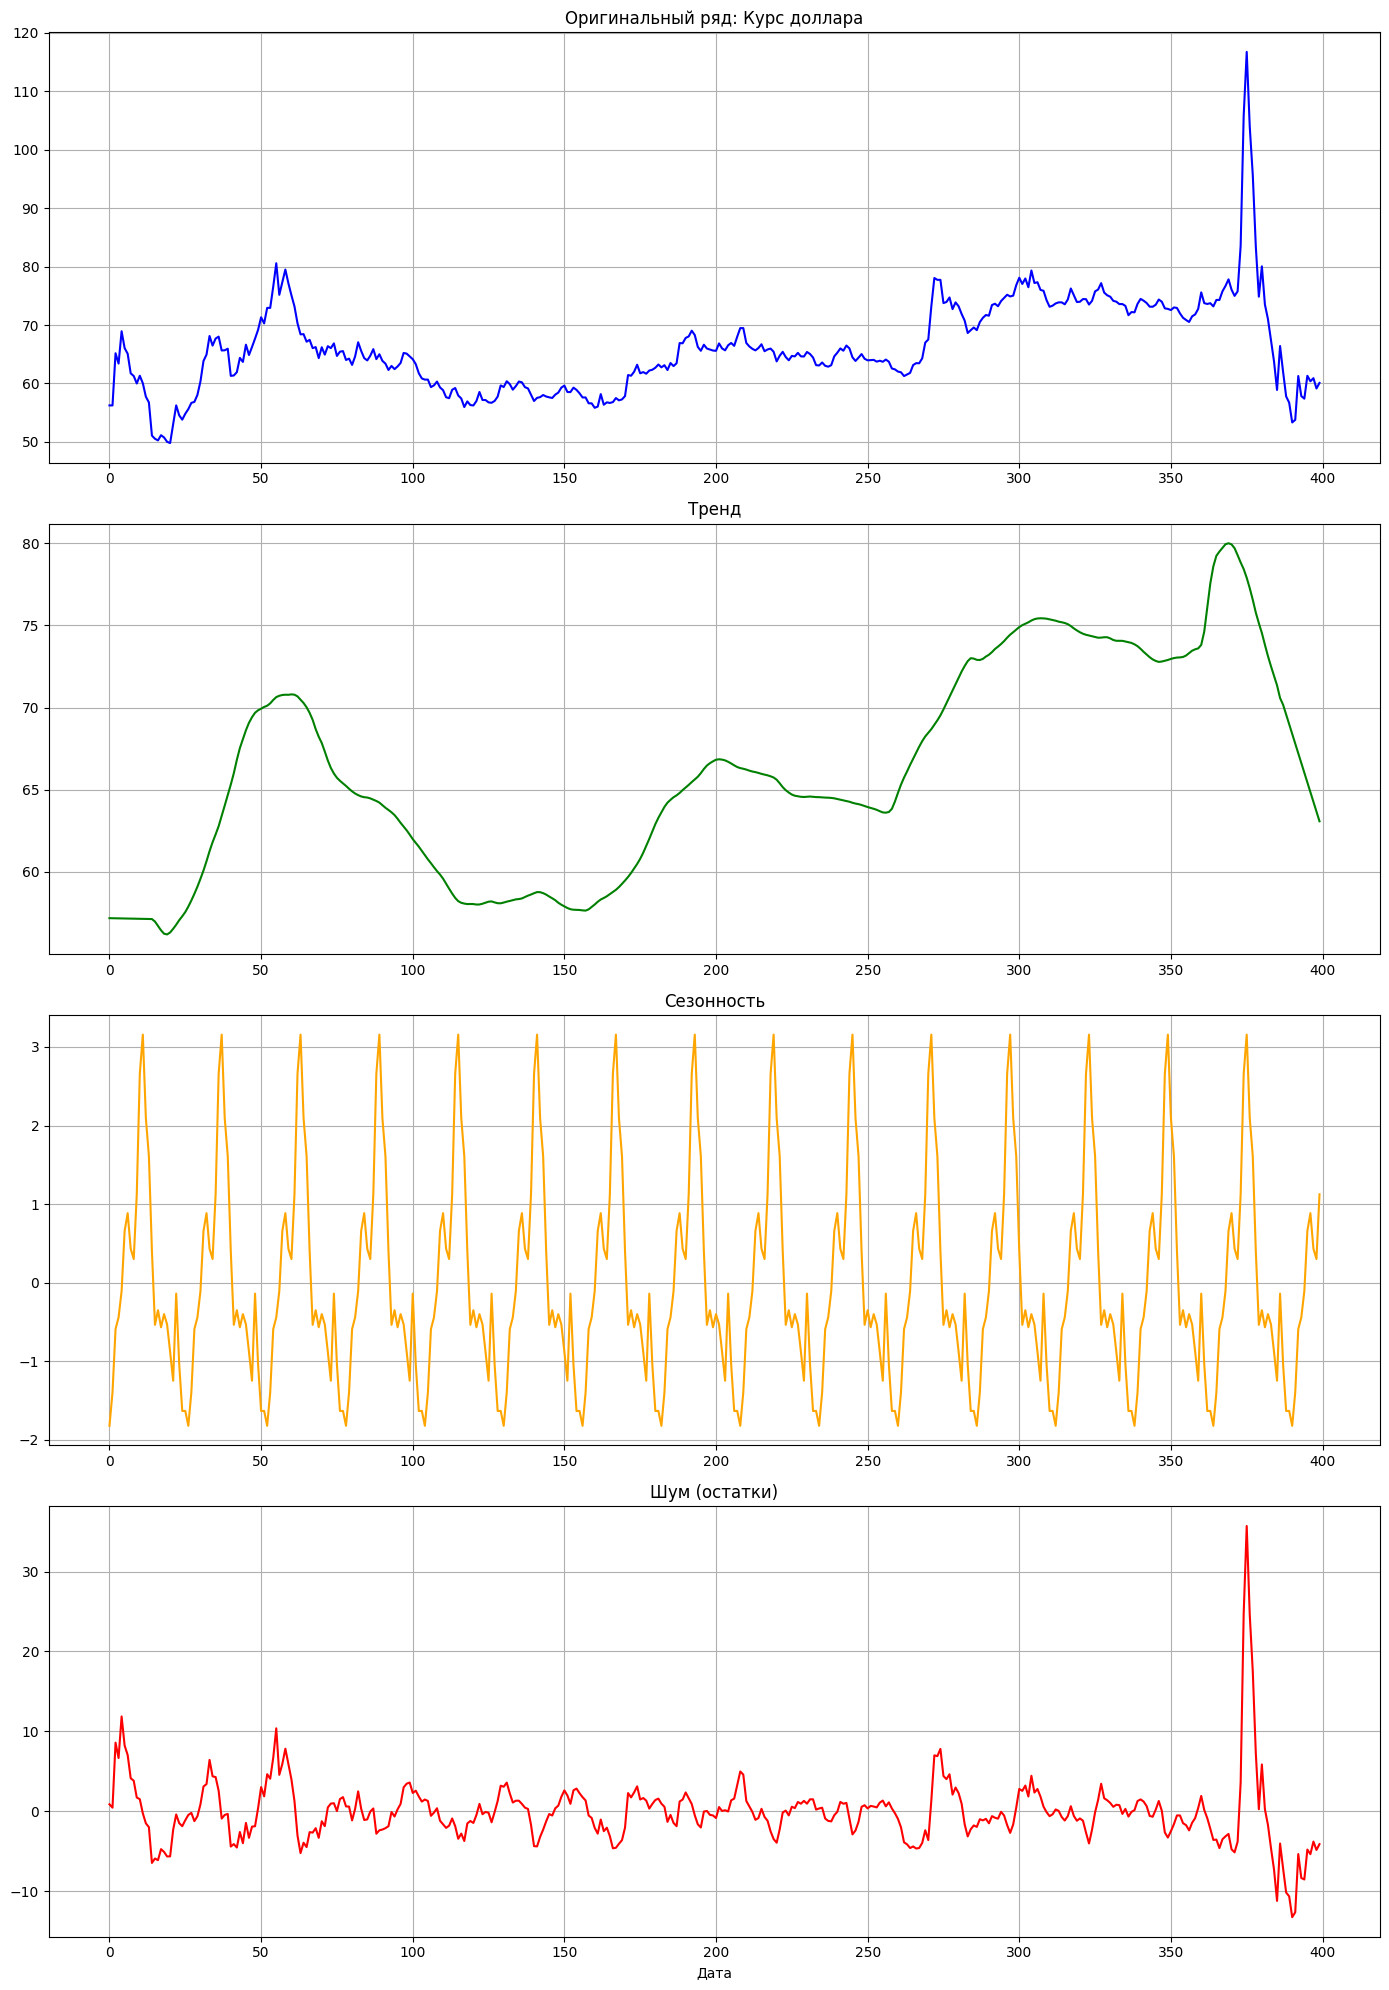

In [19]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏–∏ –¥–ª—è –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
selected_columns = ["–ö—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞"]  # –ú–æ–∂–Ω–æ –º–µ–Ω—è—Ç—å —Å–ø–∏—Å–æ–∫
plot_multiple_decompositions(df_ts, selected_columns, period=26)

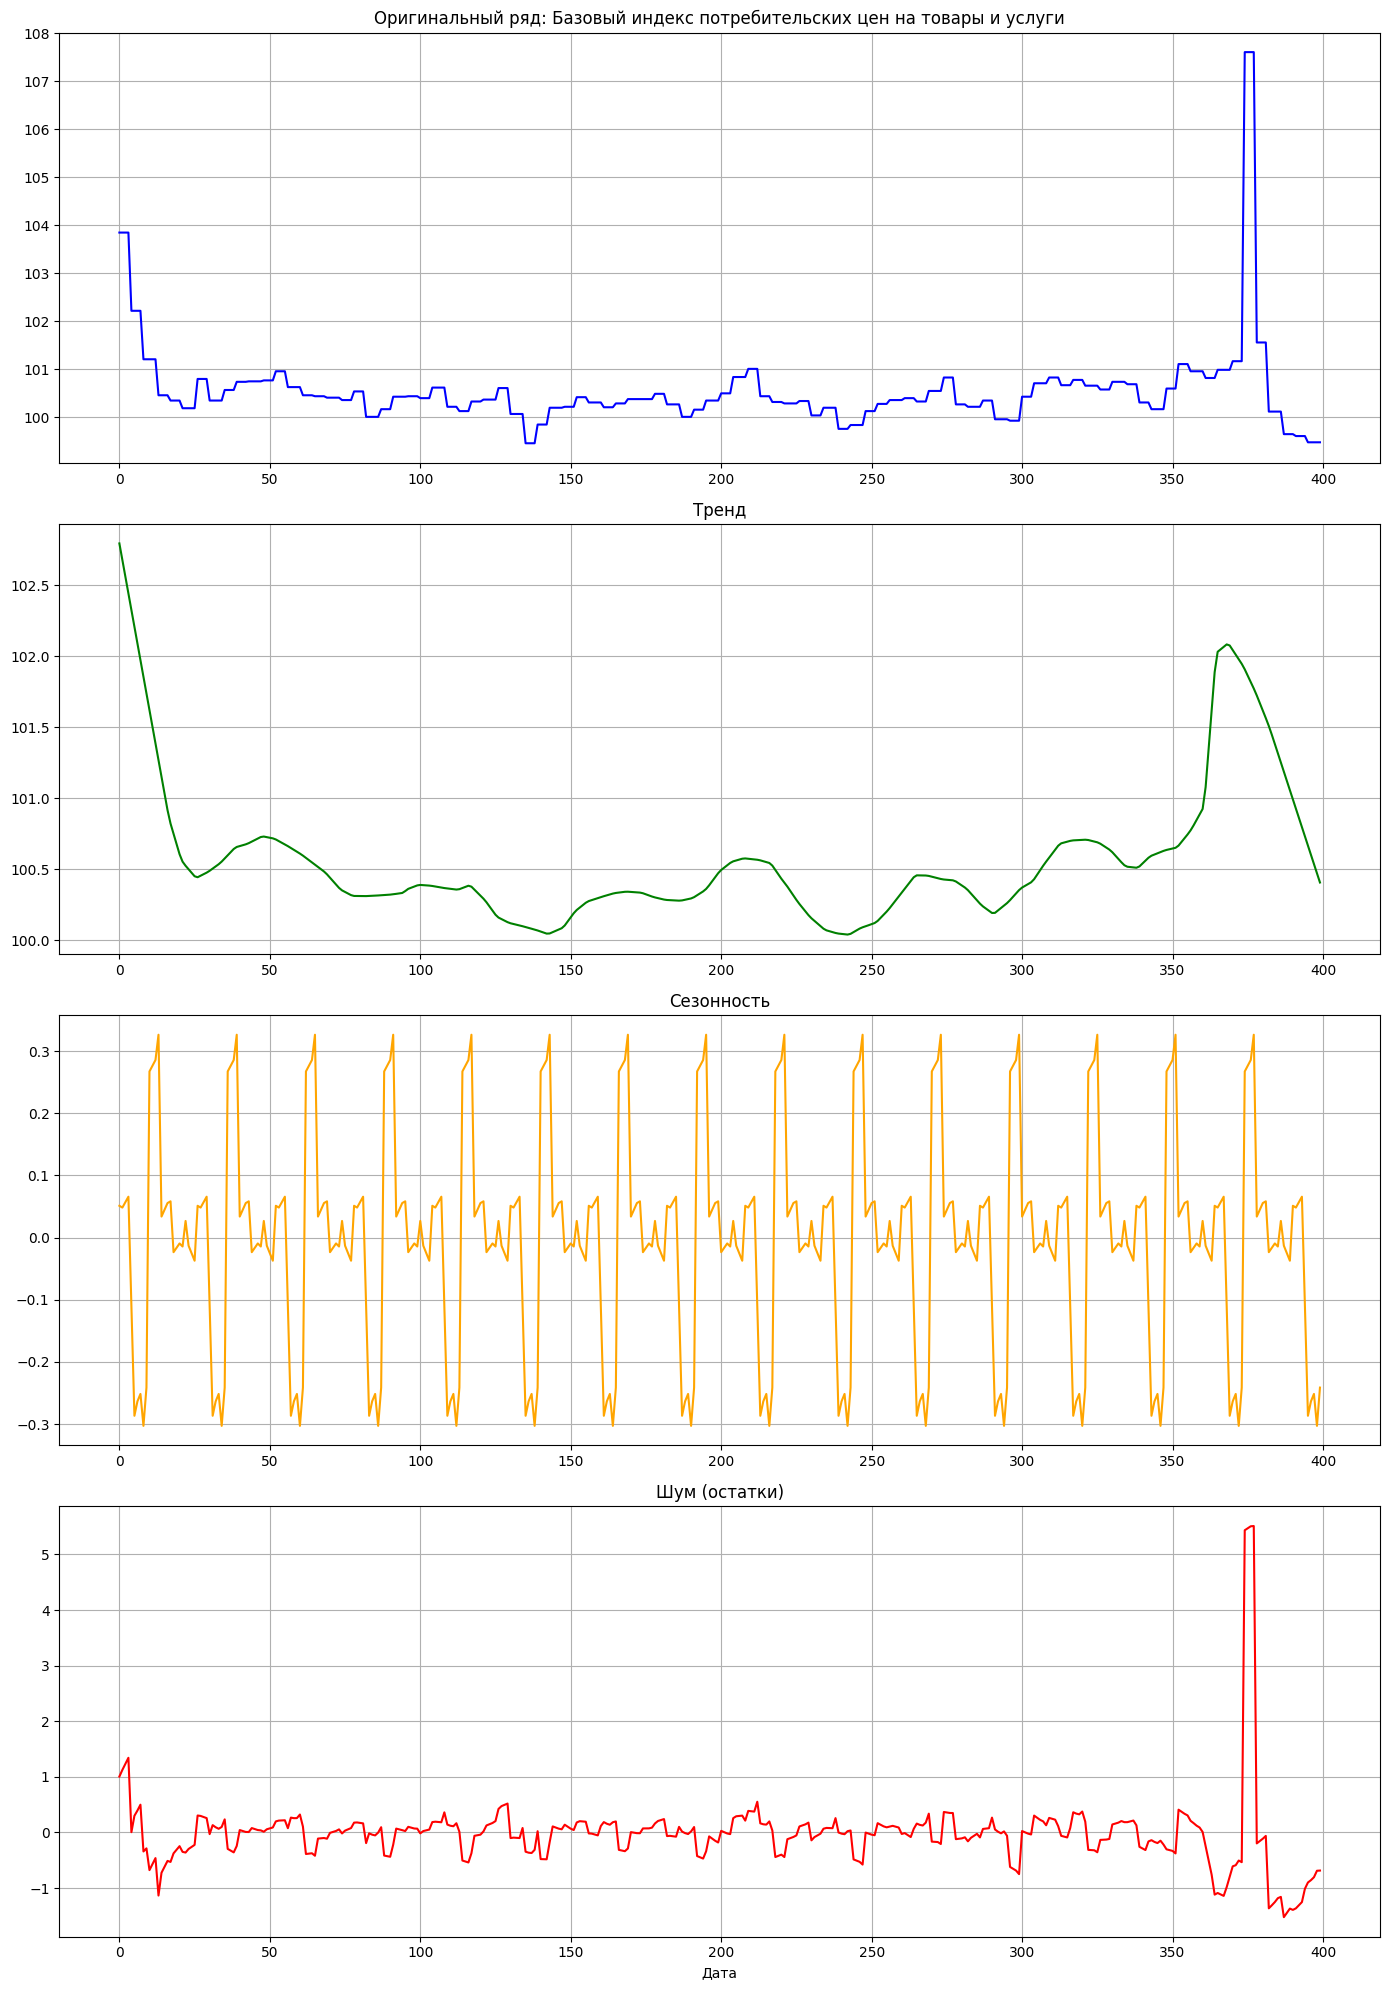

In [20]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏–∏ –¥–ª—è –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
selected_columns = ["–ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏"]  # –ú–æ–∂–Ω–æ –º–µ–Ω—è—Ç—å —Å–ø–∏—Å–æ–∫
plot_multiple_decompositions(df_ts, selected_columns, period=26)

In [21]:
# –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω–æ–≥–æ —Ä—è–¥–∞
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —Ç–µ—Å—Ç–∞ ADF
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

    if result[1] < 0.05:
        print("–†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value < 0.05)")
    else:
        print("–†—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value >= 0.05)")
# –ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥
adf_test(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'])

ADF Statistic: -1.9258699893713456
p-value: 0.31999061025699155
Critical Values: {'1%': -3.4470566389664703, '5%': -2.8689037160476016, '10%': -2.570692663557422}
–†—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value >= 0.05)


Text(0.5, 1.0, '–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É')

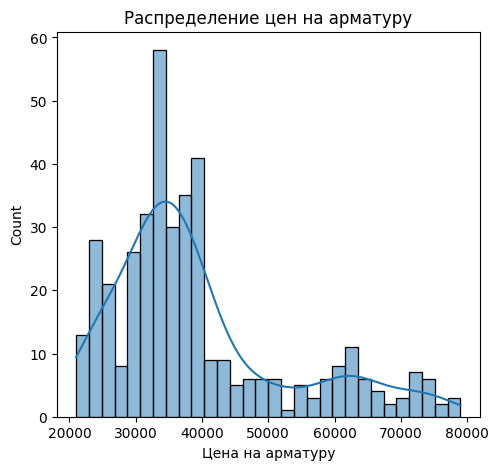

In [22]:
plt.figure(figsize=(12, 5))

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞
plt.subplot(1, 2, 1)
sns.histplot(df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É"], bins=30, kde=True)
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")


–ù–∞ –≥—Ä–∞—Ñ–∏–∫–∏ –≤–∏–¥–µ–º —á—Ç–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π  –ø—Ä–∏–º–µ—Ä–Ω–æ —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–µ–Ω–æ –º–µ–∂–¥—É 30—Ç—ã—Å –∏ 40—Ç—ã—Å

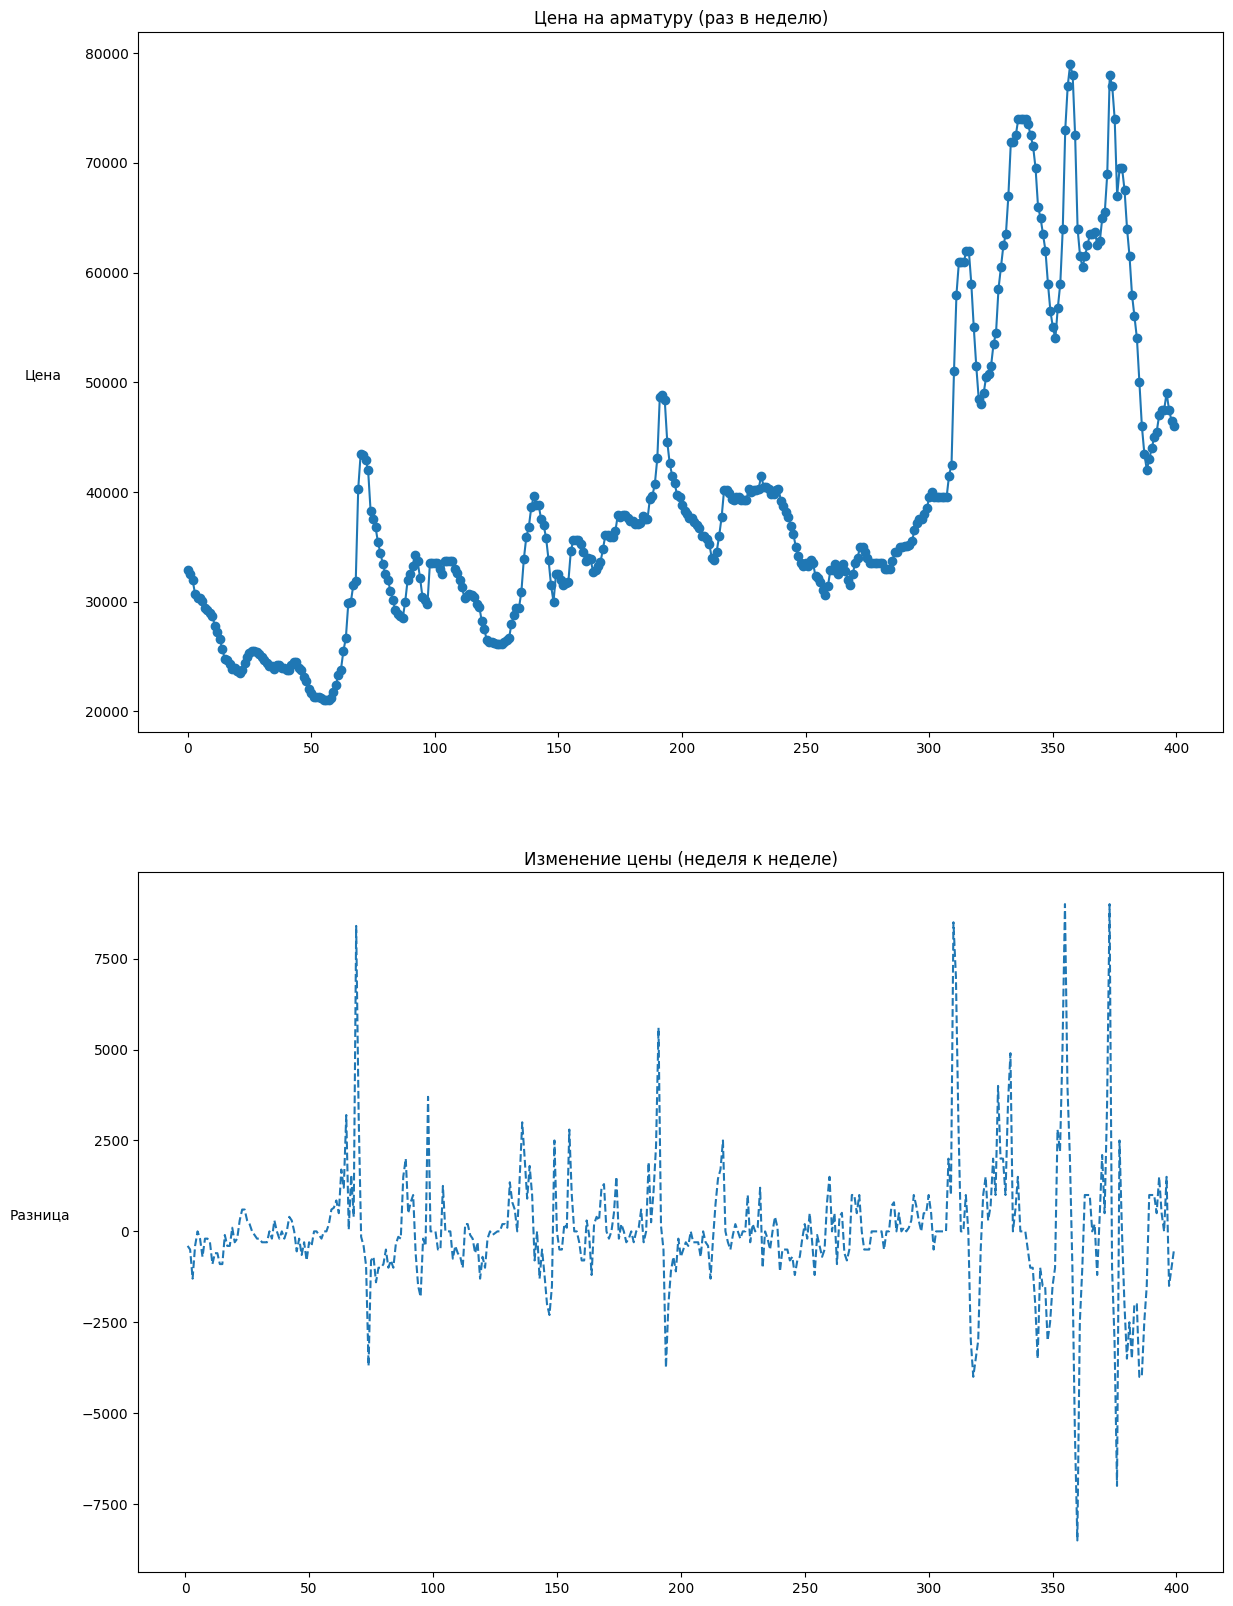

In [23]:
df_ts['–¶–µ–Ω–∞_—Ä–∞–∑–Ω–∏—Ü–∞_–Ω–µ–¥–µ–ª—è'] = df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'].diff(1)  # –†–∞–∑–Ω–∏—Ü–∞ —Å –ø—Ä–æ—à–ª–æ–π –Ω–µ–¥–µ–ª–µ–π

plt.figure(figsize=(14, 20))

ax1 = plt.subplot(211)
ax1.set_title('–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Ä–∞–∑ –≤ –Ω–µ–¥–µ–ª—é)')
ax1.set_ylabel('–¶–µ–Ω–∞', rotation=0, labelpad=30)
df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'].plot(ax=ax1, marker='o')

ax2 = plt.subplot(212)
ax2.set_title('–ò–∑–º–µ–Ω–µ–Ω–∏–µ —Ü–µ–Ω—ã (–Ω–µ–¥–µ–ª—è –∫ –Ω–µ–¥–µ–ª–µ)')
ax2.set_ylabel('–†–∞–∑–Ω–∏—Ü–∞', rotation=0, labelpad=30)
df_ts['–¶–µ–Ω–∞_—Ä–∞–∑–Ω–∏—Ü–∞_–Ω–µ–¥–µ–ª—è'].plot(ax=ax2, marker='', linestyle='dashed')

plt.show()

In [24]:
df_ts.replace(np.nan, 0, inplace=True)

In [25]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   dt                                                              400 non-null    datetime64[ns]
 1   –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É                                                400 non-null    int64         
 2   –ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏           400 non-null    float64       
 3   –ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞                                                 400 non-null    float64       
 4   –ö—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞                                                    400 non-null    float64       
 5   –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É_trend                                          400 non-null    float64    

In [26]:
df_ts.head(10)

dt  –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É  \
0 2015-01-05             32900   
1 2015-01-12             32500   
2 2015-01-19             32000   
3 2015-01-26             30700   
4 2015-02-02             30300   
5 2015-02-09             30300   
6 2015-02-16             30100   
7 2015-02-23             29400   
8 2015-03-02             29200   
9 2015-03-09             29000   

   –ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏  –ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞  \
0                                             103.85                 17.0   
1                                             103.85                 17.0   
2                                             103.85                 17.0   
3                                             103.85                 17.0   
4                                             102.22                 15.0   
5                                             102.22                 15.0   
6                                             102.22                 15.0   
7                                             102.22                 15.0   
8                                             101.21                 15.0   
9                                             101.21                 15.0   

   –ö—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞  –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É_trend  –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É_seasonal  \
0       56.2376            30757.692308                 424.348434   
1       56.2376            30480.769231                 501.752281   
2       65.1738            30203.846154                 463.771511   
3       63.3930            29926.923077                 318.699396   
4       68.9291            29650.000000                 -36.012143   
5       66.0432            29373.076923                -248.848681   
6       65.0862            29096.153846                -456.060219   
7       61.7235            28819.230769                -683.704450   
8       61.2718            28542.307692                -620.363104   
9       59.9938            28265.384615                 527.713819   

   –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É_residual  \
0                1717.959258   
1                1517.478489   
2                1332.382335   
3                 454.377527   
4                 686.012143   
5                1175.771758   
6                1459.906373   
7                1264.473681   
8                1278.055412   
9                 206.901566   

   –ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏_trend  \
0                                         102.794038             
1                                         102.676731             
2                                         102.559423             
3                                         102.442115             
4                                         102.324808             
5                                         102.207500             
6                                         102.090192             
7                                         101.972885             
8                                         101.855577             
9                                         101.738269             

   –ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏_seasonal  \
0                                           0.051064                
1                                           0.048167                
2                                           0.056917                
3                                           0.065667                
4                                          -0.109465                
5                                          -0.286749                
6                                          -0.263552                
7                                          -0.251605                
8                                          -0.302975                
9                          

In [27]:
from statsmodels.tsa.stattools import adfuller

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏
def check_stationarity(series, name):
    result = adfuller(series.dropna())  # –£–¥–∞–ª—è–µ–º NaN, –µ—Å–ª–∏ –æ–Ω–∏ –µ—Å—Ç—å
    print(f"ADF —Ç–µ—Å—Ç –¥–ª—è {name}: p-–∑–Ω–∞—á–µ–Ω–∏–µ = {result[1]:.4f}")
    if result[1] > 0.05:
        print(f"–†—è–¥ {name} –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω.")
    else:
        print(f"–†—è–¥ {name} —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω.")
    print("---" * 20)  # –î–æ–±–∞–≤–ª—è–µ–º —Ä–∞–∑–¥–µ–ª–∏—Ç–µ–ª—å

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏ –¥–ª—è –≤—Å–µ—Ö –∫–æ–ª–æ–Ω–æ–∫
for column in df_ts.columns:
    check_stationarity(df_ts[column], column)

ADF —Ç–µ—Å—Ç –¥–ª—è dt: p-–∑–Ω–∞—á–µ–Ω–∏–µ = 0.9553
–†—è–¥ dt –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω.
------------------------------------------------------------
ADF —Ç–µ—Å—Ç –¥–ª—è –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É: p-–∑–Ω–∞—á–µ–Ω–∏–µ = 0.3200
–†—è–¥ –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω.
------------------------------------------------------------
ADF —Ç–µ—Å—Ç –¥–ª—è –ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏: p-–∑–Ω–∞—á–µ–Ω–∏–µ = 0.0003
–†—è–¥ –ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω.
------------------------------------------------------------
ADF —Ç–µ—Å—Ç –¥–ª—è –ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞: p-–∑–Ω–∞—á–µ–Ω–∏–µ = 0.0956
–†—è–¥ –ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω.
------------------------------------------------------------
ADF —Ç–µ—Å—Ç –¥–ª—è –ö—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞: p-–∑–Ω–∞—á–µ–Ω–∏–µ = 0.0227
–†—è–¥ –ö—É—Ä—Å –¥–æ–ª–

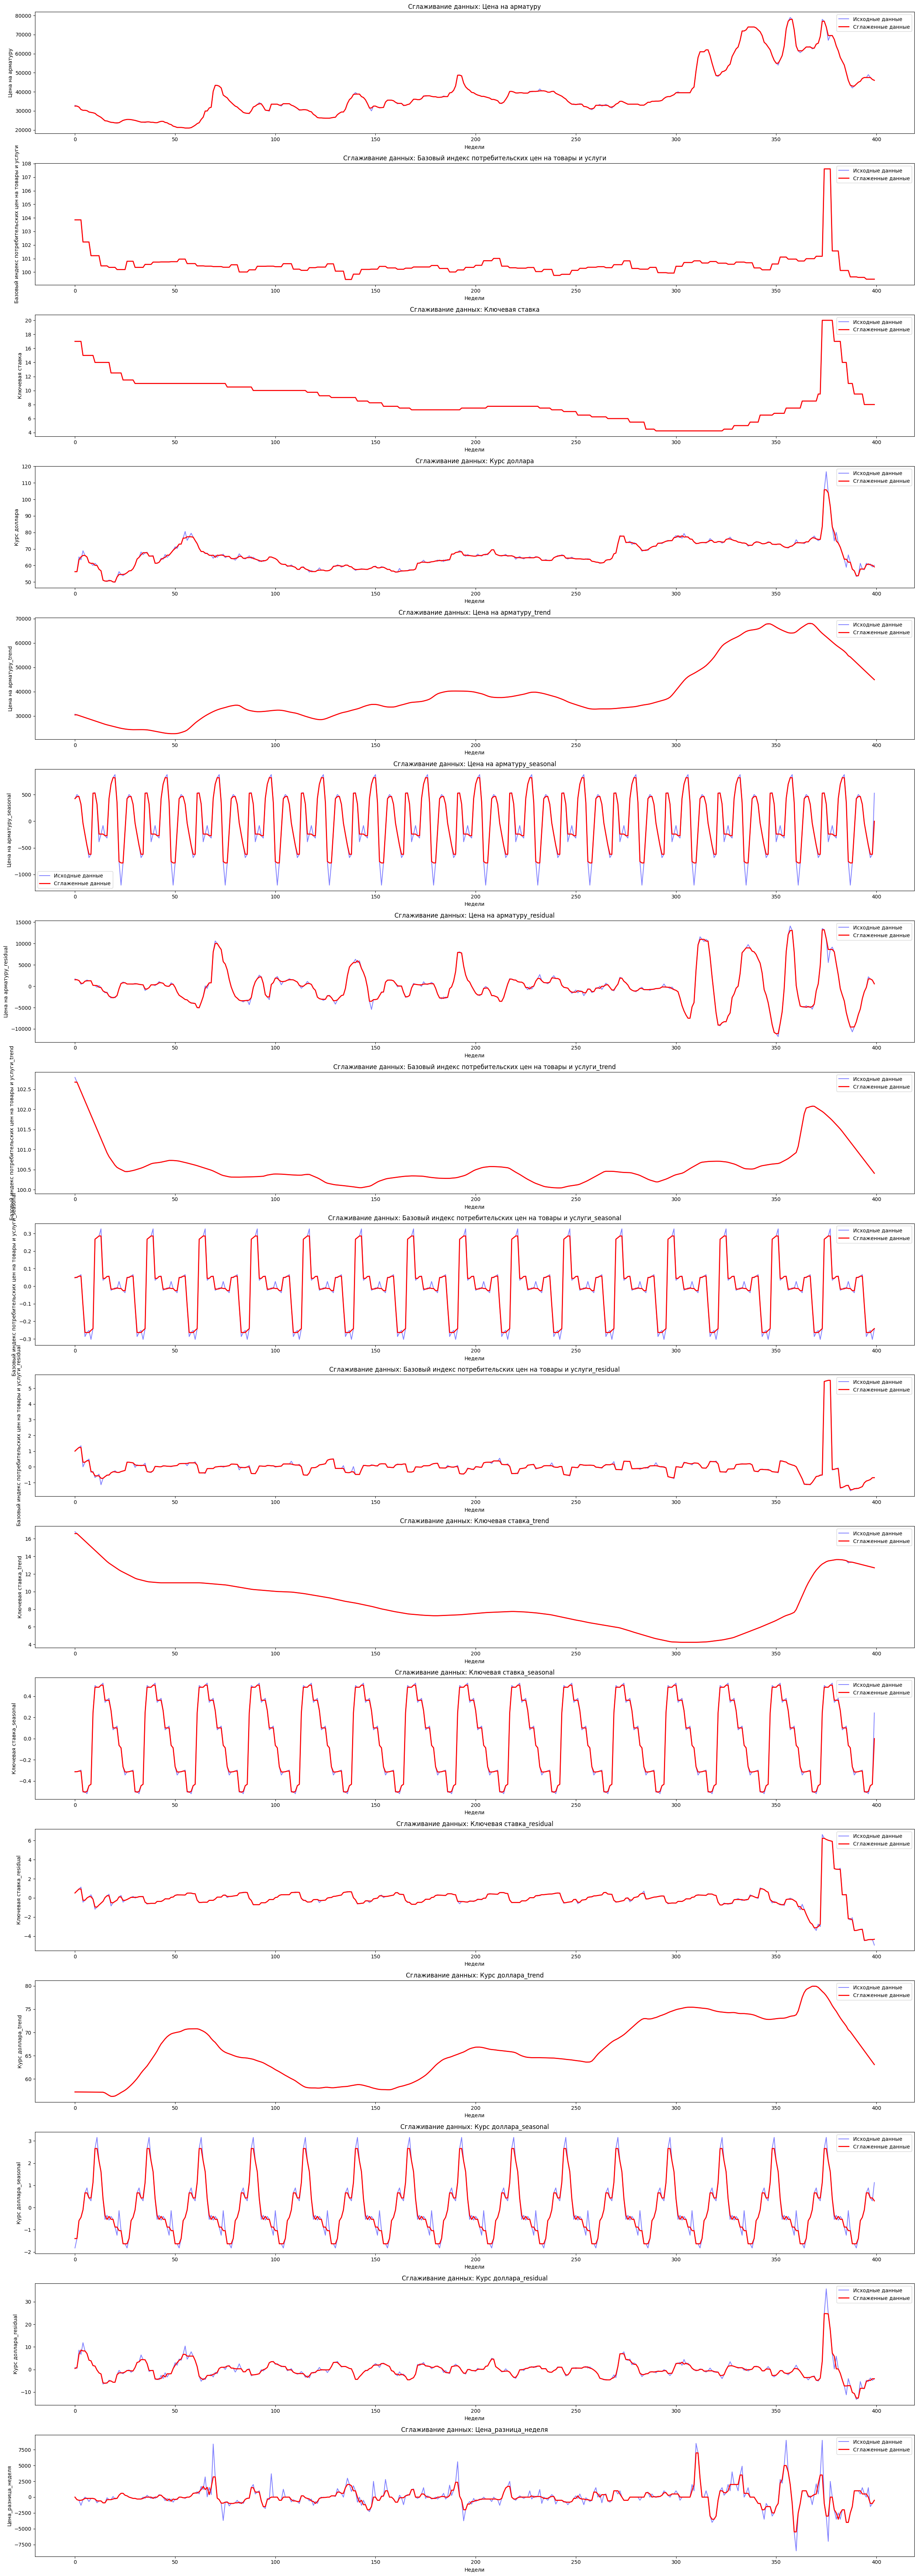

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import medfilt


# –°–æ–∑–¥–∞–µ–º –∫–æ–ø–∏—é DataFrame –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —Å–≥–ª–∞–∂–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
df_smoothed = df_ts.copy()

# –ü—Ä–∏–º–µ–Ω—è–µ–º –º–µ–¥–∏–∞–Ω–Ω—ã–π —Ñ–∏–ª—å—Ç—Ä —Ç–æ–ª—å–∫–æ –∫ —á–∏—Å–ª–æ–≤—ã–º –∫–æ–ª–æ–Ω–∫–∞–º
for column in df_ts.select_dtypes(include=['number']).columns:  # –í—ã–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –∫–æ–ª–æ–Ω–∫–∏
    df_smoothed[f"{column}_smoothed"] = medfilt(df_ts[column], kernel_size=3)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π —á–∏—Å–ª–æ–≤–æ–π –∫–æ–ª–æ–Ω–∫–∏
plt.figure(figsize=(25, 70))

# –ü—Ä–æ—Ö–æ–¥–∏–º –ø–æ –≤—Å–µ–º —á–∏—Å–ª–æ–≤—ã–º –∫–æ–ª–æ–Ω–∫–∞–º –∏ —Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫–∏
for i, column in enumerate(df_ts.select_dtypes(include=['number']).columns, 1):
    plt.subplot(len(df_ts.select_dtypes(include=['number']).columns), 1, i)

    # –ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
    plt.plot(df_ts.index, df_ts[column], label="–ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ", color='blue', alpha=0.5)

    # –°–≥–ª–∞–∂–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
    plt.plot(df_smoothed.index, df_smoothed[f"{column}_smoothed"], label="–°–≥–ª–∞–∂–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ", color='red', linewidth=2)

    # –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≥—Ä–∞—Ñ–∏–∫–∞
    plt.title(f"–°–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö: {column}")
    plt.xlabel("–ù–µ–¥–µ–ª–∏")
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
plt.show()

–í–æ –≤—Å–µ –≥—Ä–∞—Ñ–∏–∫–∞—Ö –≤–∏–¥–Ω–æ –∫–∞–∫ —Å–≥–ª–∞–¥–∏—Å–ª–∏—Å—å –¥–∞–Ω–Ω—ã–µ –≤ –∫–æ–ª–æ–Ω–∫–∞—Ö –¥–ª—è —É–º–µ–Ω—å—à–µ–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —à—É–º–æ–≤


# –ú–æ–¥–µ–ª–∏

### GRU

–ò—Å–ø–æ–ª—å–∑—É–µ–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è X: ['–ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏_smoothed', '–ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞_smoothed', '–ö—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞_smoothed', '–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É_trend_smoothed', '–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É_seasonal_smoothed', '–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É_residual_smoothed', '–ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏_trend_smoothed', '–ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏_seasonal_smoothed', '–ë–∞–∑–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ü–µ–Ω –Ω–∞ —Ç–æ–≤–∞—Ä—ã –∏ —É—Å–ª—É–≥–∏_residual_smoothed', '–ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞_trend_smoothed', '–ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞_seasonal_smoothed', '–ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞_residual_smoothed', '–ö—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞_trend_smoothed', '–ö—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞_seasonal_smoothed', '–ö—É—Ä

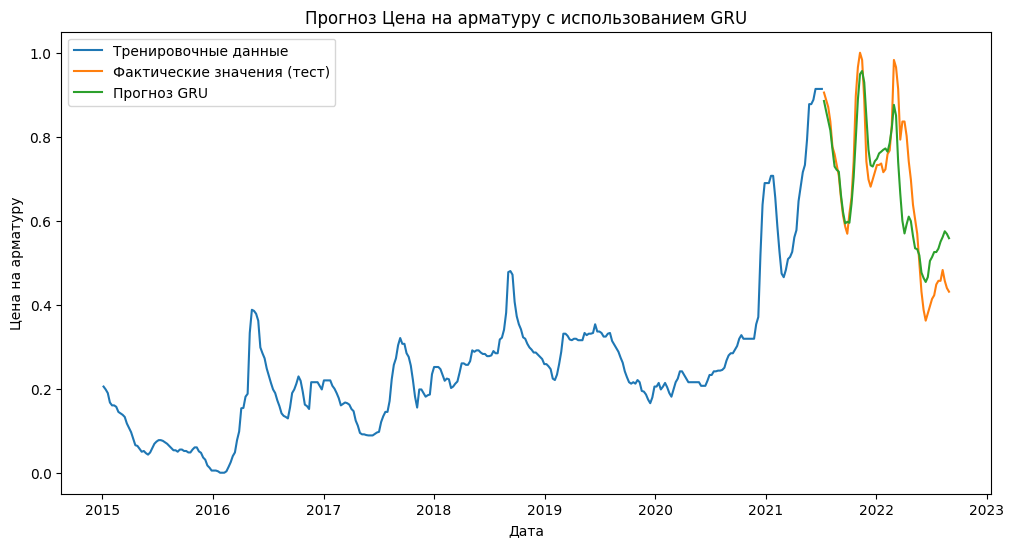

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
target_column = "–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É"

# –í—ã–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ —Å–≥–ª–∞–∂–µ–Ω–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏, –∏—Å–∫–ª—é—á–∞—è —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∏ –µ—ë —Å–≥–ª–∞–∂–µ–Ω–Ω—É—é –≤–µ—Ä—Å–∏—é, –Ω–æ –æ—Å—Ç–∞–≤–ª—è–µ–º 'dt' –≤ df_smoothed
feature_columns = [col for col in df_smoothed.columns if col.endswith("_smoothed") and col != target_column and col != f"{target_column}_smoothed"]

# –í—ã–≤–æ–¥ —Å–ø–∏—Å–∫–∞ –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
print("–ò—Å–ø–æ–ª—å–∑—É–µ–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è X:", feature_columns)

# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö (–∫—Ä–æ–º–µ dt)
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

df_smoothed[feature_columns] = scaler_X.fit_transform(df_smoothed[feature_columns])
df_smoothed[target_column] = scaler_y.fit_transform(df_smoothed[[target_column]])

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train/test, dt –æ—Å—Ç–∞–µ—Ç—Å—è –≤ df_smoothed
train_size = int(len(df_smoothed) * 0.8)
train_data, test_data = df_smoothed.iloc[:train_size].copy(), df_smoothed.iloc[train_size:].copy()

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π
def create_sequences(data, seq_length, feature_columns, target_column):
    X, y, dt_values = [], [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length][feature_columns].values)
        y.append(data.iloc[i+seq_length][target_column])
        dt_values.append(data.iloc[i+seq_length]["dt"])  # –°–æ—Ö—Ä–∞–Ω—è–µ–º –¥–∞—Ç—ã –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
    return np.array(X), np.array(y), dt_values

seq_length = 20  # –î–ª–∏–Ω–∞ –æ–∫–Ω–∞

# –§–æ—Ä–º–∏—Ä—É–µ–º –æ–±—É—á–∞—é—â–∏–µ –∏ —Ç–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ
X_train, y_train, _ = create_sequences(train_data, seq_length, feature_columns, target_column)
X_test, y_test, dt_test = create_sequences(test_data, seq_length, feature_columns, target_column)

# –ò–∑–º–µ–Ω—è–µ–º —Ñ–æ—Ä–º—É –¥–∞–Ω–Ω—ã—Ö –¥–ª—è GRU
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], len(feature_columns)))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], len(feature_columns)))

# –°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ GRU
model = Sequential([
    Bidirectional(GRU(64, return_sequences=True, input_shape=(seq_length, len(feature_columns)))),
    Dropout(0.2),
    GRU(32),
    Dense(16, activation='relu'),
    Dense(1)
])

# –ö–æ–º–ø–∏–ª—è—Ü–∏—è –º–æ–¥–µ–ª–∏
model.compile(optimizer='adam', loss='mse')

# –†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
history = model.fit(X_train, y_train, epochs=300, batch_size=8,
                    validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred = model.predict(X_test)

# –û–±—Ä–∞—Ç–Ω–æ–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
smape = np.mean(2 * np.abs(y_test_inv - y_pred_inv) / (np.abs(y_test_inv) + np.abs(y_pred_inv))) * 100
r2 = r2_score(y_test_inv, y_pred_inv)

# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
print(f"–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ (MAE): {mae:.2f}")
print(f"–ö–æ—Ä–µ–Ω—å —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏ (RMSE): {rmse:.2f}")
print(f"–°–∏–º–º–µ—Ç—Ä–∏—á–Ω–∞—è MAPE (SMAPE): {smape:.2f}%")
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ (R^2): {r2:.4f}")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
plt.figure(figsize=(12, 6))
plt.plot(df_smoothed['dt'][:train_size + seq_length],
         scaler_y.inverse_transform(df_smoothed[[target_column]])[:train_size + seq_length],
         label="–¢—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ")
plt.plot(dt_test, y_test_inv, label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è (—Ç–µ—Å—Ç)")
plt.plot(dt_test, y_pred_inv, label="–ü—Ä–æ–≥–Ω–æ–∑ GRU")
plt.xlabel("–î–∞—Ç–∞")
plt.ylabel(target_column)
plt.title(f"–ü—Ä–æ–≥–Ω–æ–∑ {target_column} —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º GRU")
plt.legend()
plt.show()
# 28

–í–≤–µ–¥–∏—Ç–µ –¥–∞—Ç—É –≤ —Ñ–æ—Ä–º–∞—Ç–µ YYYY-MM-DD: 2022-07-09
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 35ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 33ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 35ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 34ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 34ms/step

–ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ 6 –Ω–µ–¥–µ–ª—å –≤–ø–µ—Ä–µ–¥ –æ—Ç 2022-07-09:
2022-07-18: 0.53 —Ä—É–±–ª–µ–π –∑–∞ —Ç–æ–Ω–Ω—É
2022-07-25: 0.51 —Ä—É–±–ª–µ–π –∑–∞ —Ç–æ–Ω–Ω—É
2022-08-01: 0.48 —Ä—É–±–ª–µ–π –∑–∞ —Ç–æ–Ω–Ω—É
2022-08-08: 0.45 —Ä—É–±–ª–µ–π –∑–∞ —Ç–æ–Ω–Ω—É
2022-08-15: 0.41 —Ä—É–±–ª–µ–π –∑–∞ —Ç–æ–Ω–Ω—É
2022-08-22: 0.37 —Ä—É–±–ª–µ–π –∑–∞ —Ç–æ–Ω–Ω—É


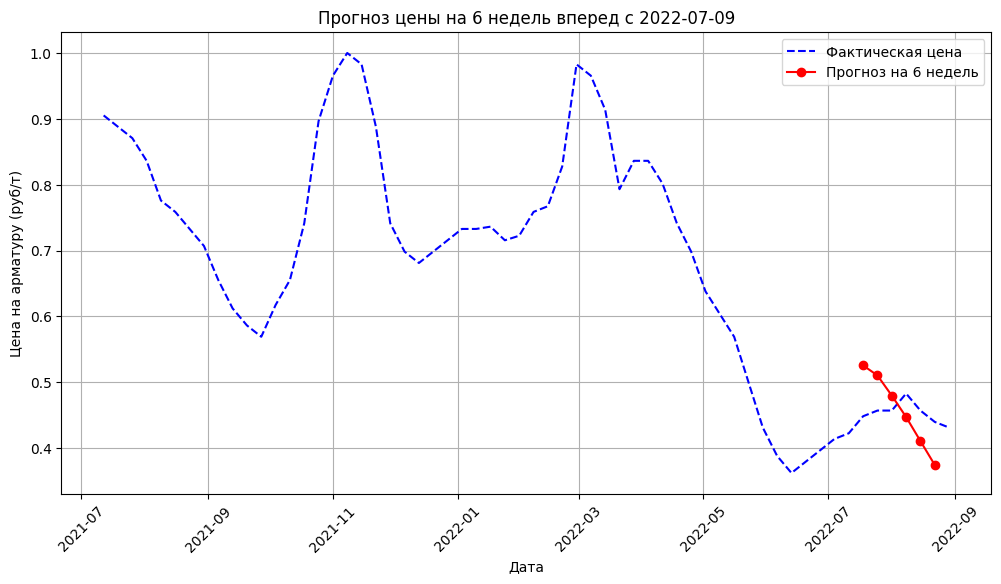

In [33]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# –§—É–Ω–∫—Ü–∏—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –Ω–∞ 6 –Ω–µ–¥–µ–ª—å –≤–ø–µ—Ä–µ–¥
def predict_next_6_weeks(start_date):
    start_date = pd.to_datetime(start_date)

    # –ù–∞–π—Ç–∏ –±–ª–∏–∂–∞–π—à—É—é –¥–∞—Ç—É –≤ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ
    closest_date = min(dt_test, key=lambda d: abs(d - start_date))
    date_index = dt_test.index(closest_date)

    # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º —Å–ø–∏—Å–æ–∫ –ø—Ä–æ–≥–Ω–æ–∑–æ–≤
    predictions = []
    dates = []

    # –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ –Ω–∞ 6 –Ω–µ–¥–µ–ª—å –≤–ø–µ—Ä–µ–¥
    current_input = X_test[date_index].reshape(1, seq_length, len(feature_columns))

    for i in range(6):
        pred_price = model.predict(current_input)[0][0]
        pred_price_inv = scaler_y.inverse_transform([[pred_price]])[0][0]

        predictions.append(pred_price_inv)
        dates.append(closest_date + pd.Timedelta(weeks=i+1))

        # –û–±–Ω–æ–≤–ª—è–µ–º –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, —Å–¥–≤–∏–≥–∞—è –æ–∫–Ω–æ
        current_input = np.roll(current_input, shift=-1, axis=1)
        current_input[0, -1, :] = pred_price

    return dates, predictions

# –ó–∞–ø—Ä–æ—Å –¥–∞—Ç—ã –æ—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
user_input_date = input("–í–≤–µ–¥–∏—Ç–µ –¥–∞—Ç—É –≤ —Ñ–æ—Ä–º–∞—Ç–µ YYYY-MM-DD: ")

try:
    forecast_dates, forecast_prices = predict_next_6_weeks(user_input_date)

    print(f"\n–ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ 6 –Ω–µ–¥–µ–ª—å –≤–ø–µ—Ä–µ–¥ –æ—Ç {user_input_date}:")
    for date, price in zip(forecast_dates, forecast_prices):
        print(f"{date.strftime('%Y-%m-%d')}: {round(price, 2)} —Ä—É–±–ª–µ–π –∑–∞ —Ç–æ–Ω–Ω—É")

    # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
    plt.figure(figsize=(12, 6))

    # –§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ
    plt.plot(dt_test, y_test_inv, label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∞—è —Ü–µ–Ω–∞", color="blue", linestyle="dashed")

    # –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º—ã–µ —Ü–µ–Ω—ã
    plt.plot(forecast_dates, forecast_prices, label="–ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ 6 –Ω–µ–¥–µ–ª—å", color="red", marker="o")

    # –û—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
    plt.xlabel("–î–∞—Ç–∞")
    plt.ylabel("–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Ä—É–±/—Ç)")
    plt.title(f"–ü—Ä–æ–≥–Ω–æ–∑ —Ü–µ–Ω—ã –Ω–∞ 6 –Ω–µ–¥–µ–ª—å –≤–ø–µ—Ä–µ–¥ —Å {user_input_date}")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

    # –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –≥—Ä–∞—Ñ–∏–∫
    plt.show()

except Exception as e:
    print("–û—à–∏–±–∫–∞! –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ –¥–∞—Ç–∞ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö.")